# GML - Mini-Challenge 1 - FS 2022

**Ausgabe:** Montag, 21. März 2022  
**Abgabe:** Sonntag, 24. April 2022, bis 24 Uhr 

In dieser Mini-Challenge implementieren und verwenden wir verschiedene Supervised Learning-Methoden und machen Gebrauch von Model Selection-Prinzipien und -Algorithmen.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln zahlreiche Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss von Anfang bis Ende lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. Nur was korrekt ausführt wird bewertet.
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

**Ridge Regression** (siehe beispielsweise James et al., *An Introduction to Statistical Learning*, 2015, pp 215) ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion für einen Datensatz $(x^{(i)}, y^{(i)})$ mit $x^{(i)} = (x_1^{(i)}, \dots , x_p^{(i)})$ von $N$ Datenpunkten ist: 

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha\sum_{j=1}^{p} \beta_j^2 
\end{equation}

$(\beta_0, \beta_1, \dots, \beta_p)$ sind dabei die Modellkoeffizienten.

Es gilt zu beachten, dass bei Ridge Regression der Achsenabschnitt, i.e. der Modellkoeffizient $\beta_0$ nicht in den Penalty Term der Kostenfunktion eingeht. Das zeigt sich in obiger Gleichung durch die Summe von $i=1$ (nicht $i=0$) bis $p$ (Anzahl Prädiktoren).

Für die Optimierung der Koeffizienten bei gegebenem Datensatz ergeben sich dadurch Implikationen für Gradient Descent und Normalengleichung.  

Wenn man die Input-Variablen standardisiert, was **bei Regularisierung fast immer angezeigt** ist um sämtliche Variablen auf eine vergleichbare Skala (dimensionslose Standardabweichungen) zu bringen, und damit die zugehörigen Koeffizienten in ähnlichem Umfang zu regularisieren, ist es eine Möglichkeit das Optimierungsproblem für $\beta_0$ und die restlichen Variablen zu separieren. $\beta_0$ kann dann nämlich mit $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet werden und ist so unregularisiert. Die Koeffizienten $(\beta_1, \dots, \beta_p)$ werden dann mit Gradient Descent oder Normalengleichen optimiert.

Möchte man alle Modell-Koeffizienten, inklusive $\beta_0$, mittels Gradient Descent optimieren, so gilt es eine Fallunterscheidung bei der Berechnung des Gradienten zu machen für die Gradienten-Komponente $0$, welche zum Koeffizienten $\beta_0$ gehört, und den verbleibenden Gradienten-Komponenten $1$ bis $p$, welche zu den Modellkoeffizienten $(\beta_1, \dots, \beta_p)$ gehören. Dies deswegen, weil $\beta_0$ nicht in die Strafterm-Summe der Kostenfunktion eingeht.

### Zu Gradient Descent für Ridge Regression

Zur Verwendung von Gradient Descent muss der Gradient der Kostenfunktion berechnet werden. Der Gradient $\nabla f(\chi)$ einer Funktion $f(\cdot)$ mehrerer ($m$) Variablen $\chi = (\chi_1, \chi_2, \dots, \chi_m)$ ist gegeben durch:

\begin{equation}
\nabla f(\chi) = \Big( \frac{\partial f(\chi)}{\partial \chi_1}, \frac{\partial f(\chi)}{\partial \chi_2}, \dots, \frac{\partial f(\chi)}{\partial \chi_m}\Big)
\end{equation}

$\frac{\partial f(\chi)}{\partial \chi_i}$ ist dabei die partielle Ableitung von $f(\cdot)$ nach $\chi_i$. $\nabla f(\chi)$ ist also ein $m$-dimensionaler Vektor.   

Bei Standardisierung der Input-Variablen und separater 'Optimierung' von $\beta_0$ wird $\beta_0$ vorab berechnet, wird dann zur Konstanten in der Kostenfunktion, und muss nicht mehr mitoptimiert werden, i.e. kann beim Gradienten aussen vor gelassen werden.

### Zur Normalengleichung für Ridge Regression

Einen Input-Datensatz können wir als $N \times p+1$ Matrix $\mathbf{X}$ schreiben. $p+1$ deswegen, weil wir den $p$ Input-Variablen noch eine Spalte von $1$-en voranstellen können, um den Koeffizienten $\beta_0$ mit berücksichtigen zu können. Sie hat also die Form

\begin{equation}
\mathbf{X} = 
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_j & \cdots & x^{(1)}_p \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_j & \cdots & x^{(2)}_p \\
& & \vdots & &\\
1 & x^{(i)}_1 & x^{(i)}_2 & \cdots & x^{(i)}_j & \cdots & x^{(i)}_p \\
& & \vdots & &\\
1 & x^{(n)}_1 & x^{(n)}_2 & \cdots & x^{(n)}_j & \cdots & x^{(n)}_p
\end{bmatrix}
\end{equation}

Gleichermassen können wir unsere Output-Variablen als $N$-dimensionalen Vektor $y = (y^{(1)}, .. y^{(N)})$ betrachten.  

Damit können wir ein lineares Modell in kompakter Schreibweise wie folgt formulieren:  

\begin{equation}
y = \mathbf{X}\beta + \epsilon
\end{equation}

Wobei $\epsilon = (\epsilon_1, \cdots \epsilon_N)$ ein Vektor von irreduzierbaren Fehlern für die $N$ Datenpunkte ist.

Für die **unregularisierte OLS Kostenfunktion kann eine analytische Lösung** gefunden werden, die als Normalengleichung bezeichnet wird:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^Ty
\end{equation}


Gleichermassen kann für die analytische Lösung der **Ridge Regression Kostenfunktion** folgende analytische Lösung hergeleitet werden:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}

Möchten wir alle Modellkoeffizienten, inklusive $\beta_0$, auf einmal optimieren, ist $\mathbf{1}_R$ dabei im Grunde die $(p+1 \times p+1)$-dimensionale Einheitsmatrix. Allerdings muss das Element $(0,0)$ gleich $0$ gesetzt, dies um den Koeffizienten $\beta_0$ nicht zu regularisieren. $\mathbf{1}_R$ ist also:


\begin{equation}
\mathbf{1}_r = 
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 & \cdots & 0 \\
& &  & \ddots &  & \vdots &  \\
& \vdots &  &  & \ddots & 0 & 0 \\
0 & 0 & \cdots &  & 0 & 1 & 0 \\
0 & 0 & \cdots &  &  & 0 & 1
\end{bmatrix}
\end{equation}

**Bei standardisierten Inputdaten** kann alternativ auch der oben erwähnte Weg beschritten werden, bei welchem man $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet, die Spalte von $1$-en $\mathbf{X}$ nicht vorangestellt und schliesslich eine Normalengleichung verwendet wird mit unveränderter $(p \times p)$-dimensionaler Einheitsmatrix $\mathbf{1}$:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1})^{-1} \mathbf{X}^Ty
\end{equation}

Du bist frei in diesem Aufgabenblatt einen beliebigen (korrekten) Weg für Gradient Descent und Normalengleichung zu wählen.

---

**Aufgabe**

Leite für die obige Ridge Regression-Kostenfunktion den Gradienten und die Normalengleichung analytisch her, für den Fall dass die Inputdaten nicht standardisiert seien.  

(Schreibe die Herleitung in LaTex-Notation in die folgende Zelle).  

YOUR ANSWER HERE

Herleitung der **Gradienten Ableitung** der Ridge Regression-Kostenfunktion:  

Ridge Regression-Kostenfunktion:  

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2 +
\alpha\sum_{j=1}^{p}\beta_{j}^2
\end{equation}

Die partielle Ableitung von $J(\beta)$ nach $\frac{\partial J(\beta)}{\partial J_{\beta k}}$, wobei $\beta_{k}$ für die einzelnen Modelkoeffizienten steht:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
\frac{\partial}{\partial \beta_k} 
\sum_{i=1}^{N} \left(y^{(i)} - \beta_0 \sum_{j=1}^{p} x_j^{(i)} \beta_j\right)^2 +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}


1. Kettenregel:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right) \cdot
\frac{\partial}{\partial \beta_k} 
\left(y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j \right) + 
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
(- x_k^{(i)})\right) +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

2. Summenregel:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(- x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}

3. (-1) von $-x_k^{(i)}$ voranstellen:
\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}


Somit gilt für den Gradienten:

\begin{equation}
\nabla J(\beta) = 
\frac{\partial J(\beta)}{\partial \beta_k} = 
\left( \frac{\partial J(\beta)}{\partial \beta_1},
\frac{\partial J(\beta)}{\partial \beta_2},
\dots,
\frac{\partial J(\beta)}{\partial \beta_p}\right)
\end{equation}

Herleitung der **Normalengleichung** der Ridge Regression-Kostenfunktion

Ridge Regression-Kostenfunktion:  

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}  

wobei $\beta$ ein vektor mit den gesuchten Modellkoeffizienten ($\beta_1, \beta_2, \dots, \beta_p$) ist.

Für die Herleitung soll die oben erstellte Formel als Ausgangslage dienen:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}

$y$ ($y^{(1)}, y^{(2)},\dots, y^{(N)}$) und $\beta$ ($(\beta_0, \beta_1, \dots, \beta_p$) als Vektoren für y und die Modellkoeffizienten. Aus der Aufgabenstellung werden die Inputdaten als Matrix X dargestellt. Somit kann die Summenschreibweise als Ausdruck von Vektoren und Matrizen umgeschrieben werden.  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( x_k^{(i)} \cdot y^{(i)} - 
x_k^{(i)} \cdot \beta_0 - 
\sum_{j=1}^{p} x_k^{(i)} \cdot x_j^{(i)} \beta_j) \right) +
2 \alpha \beta_k
\end{equation}

Summenschreibweise mit Vektoren und Matrizen ersetzt:

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2( X^Ty - X^TX\beta)  +2 \alpha 1_R\beta
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2X^T (y - X\beta)  +2 \alpha 1_R\beta
\end{equation}

Für 'least squares' wird der Gradient mit Wert $0$ gesucht (mit der Hesse Matrix könnte bewiesen  werden, das es sich um ein globales Minimum handelt (Hesse = positiv definit):

\begin{equation}
\nabla J(\beta) = 
0 = -2X^Ty + 2X^TX\beta +2 \alpha 1_R\beta
\end{equation}

\begin{equation}
X^Ty = X^TX\beta +\alpha 1_R\beta
\end{equation}

\begin{equation}
X^Ty = (X^TX +\alpha 1_R) \beta
\end{equation}

Nach dem freistellen von $\beta$ erhält man die Normalengleichung der Aufgabenstellung:  

\begin{equation}
(X^TX +\alpha 1_R)^{-1}X^Ty =  \beta
\end{equation}

### Aufgabe 2 (3 Punkte)  

Was würde sich in Aufgabe 1 ändern wenn wir anstelle von Ridge Regression Lasso betrachten würden für Kostenfunktion, Koeffizientenoptimierung und Koeffizienten?

YOUR ANSWER HERE

Die Lasso Regression unterscheidet sich im Strafterm von der Ridge Regression. Anstelle eines quadratischen Strafterm
$\dots +\alpha \sum_{j=1}^{p} \beta_j^2 $ wird bei Lasso Regression der Strafterm absolut verwendet 
$\dots +\alpha \sum_{j=1}^{p} | \beta_j | $.

Lasso Regression-Kostenfunktion:  

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2 +
\alpha\sum_{j=1}^{p} | \beta_{j}|
\end{equation}

Die partielle Ableitung von $J(\beta)$ nach $\frac{\partial J(\beta)}{\partial J_{\beta k}}$, wobei $\beta_{k}$ für die einzelnen Modelkoeffizienten ändert sich folgt:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
(x_k^{(i)})\right) +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} |\beta_j|
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) + \alpha 1
\end{equation}

Die Änderungen zur Lasso Regression bedeuten für die:
1. Kostenfunktion

1. Koeffizientenoptimierung

1. Koeffizienten

### Aufgabe 3 (8 Punkte)

Komplettiere die folgende Klasse so, dass sie bei Wahl der entsprechenden Initialisierungsoption, das Ausführen der `fit`-Methode die Kostenfunktion der Ridge Regression-Kostenfunktion mit Gradient Descent (`gd`) oder der regularisierten Normalengleichung (`neq`) optimiert.

Erstelle nun einen einfachen Datensatz von 1000 Datenpunkten zur Validierung deiner Implementation: Die eindimensionalen x-Werte seien normalverteilt mit Mittelwert 5 und Standardabweichung 3. Die y-Werte seien gegeben durch ein einfaches lineares Modell mit Koeffizienten $\beta_0=-2$ und $\beta_1=3$.

Zeige damit, dass
- deine Implementierung für Gradient Descent erfolgreich konvergiert.
- du mit Normalengleichung und Gradient Descent praktisch die gleiche (korrekte) Lösung findest (verwende dazu `np.testing.assert_array_almost_equal`).
- der Effekt der Regularisierung sich wie erwartet niederschlägt, wenn du die Werte für die Koeffizienten als Funktion er Regularisierungsstärke $\alpha$ über den gesamten sinnvollen Bereich für $\alpha$ zeichnest (Ridge Regression Path). Diskutieren diesen Plot.

YOUR ANSWER HERE

In [852]:
import numpy as np
import matplotlib.pyplot as plt

In [853]:
from sklearn.base import BaseEstimator

class RidgeRegression(BaseEstimator):
    
    def __init__(self, opt_method='gd', alpha=1., eta=0.01, maxsteps=100, eps=0.00000001):
        '''Implements a Ridge Regression estimator.
        
        Arguments
        ---------
        alpha:      Regularization proportionality factor. Larger values
                    correspond with stronger regularization.
        opt_method: Optimization method to choose for the cost function.
                    Can be either 'gd' (Gradient Descent) or 'neq'.
        maxsteps:   Maximum number of Gradient Descent steps to take.
        eps:        Epsilon, length of gradient to be reached with Gradient
                    Descent.
        eta:        Fixed step lenght to take at each gradient descent
                    iteration.
        '''
        # parameters
        self.alpha = alpha
        self.opt_method = opt_method
        self.maxsteps = maxsteps
        self.eps = eps
        self.eta = eta
        # attributes
        # model coefficients
        self.beta_ = None
        # values of cost function along gradient descent iterations
        self.costs_ = []     
        self.steps_beta_ = []
        self.step_total_ = []
        
    def fit(self,X,y):
        '''        
        '''
        # YOUR CODE HERE
        if self.opt_method == 'gd':
            self.beta_ = self.gradient_descent(X, y)
            #self.beta_ = 
        if self.opt_method == 'neq':
            self.beta_ = self.normalequation(X, y)
        return self
        
    def gradient_descent(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using gradient descent.
        '''
        # YOUR CODE HERE
        # Startwerte für beta 0. Für Kostenfunktion nur ein Minimum erwartet daher 
        # startwert = 8 um den Pfad von gradient descent besser zu zeigen
        beta_gd = [8 for beta in range(X.shape[1])]
        self.step_total_ = self.maxsteps
        
        for steps in range(self.maxsteps):
            # get current Predictions
            y_pred = X @ beta_gd 

            # calc costfunction
            cost = np.sum( np.square(np.round(y - y_pred, 8) ))
            self.costs_.append(cost)

            # calc gradient
            gradient = RidgeRegression.gradient(beta_gd, X, y, self.alpha)

            # check if length gradient < eps
            if np.linalg.norm(gradient) < self.eps:
                print(f'found minima {beta_gd} after {steps} steps')
                self.step_total_ = steps
                return beta_gd

            # descent into abyss with vanilla gradient descent
            for i in range(len(beta_gd)):
                beta_gd[i] = beta_gd[i] - self.eta * RidgeRegression.gradient(beta_gd, X, y, self.alpha)[i]            
            
            # Overflow prevention mit runden
            beta_gd = np.round(beta_gd, 15)
            # save all steps
            self.steps_beta_.append(beta_gd)

        print(f'Max Anzahl steps reached: max={self.maxsteps} ')
        return beta_gd        
        
        
    def normalequation(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using the normalequation.
        '''
        # YOUR CODE HERE
        # erstellen der Einheitsmatrix mit p = Anzahl beta und Element (0,0) = 0 setzen (beta_0 nicht regularisiert)
        dim_p = X.shape[1]
        one_R = np.ones((dim_p, dim_p))
        one_R[0,0] = 0
        # beta Koeffizienten berechnen mit Ridge
        beta_norm = np.linalg.inv(X.T @ X + self.alpha*one_R) @ (X.T @ y)
        print(f'found minima {beta_norm}')
        return beta_norm
    
    @staticmethod
    def gradient(beta,X,y,alpha):
        '''Computes and returns the gradient of the ridge regression cost function.
        '''
        # Prediction, Zeilensumme = y_pred. X @ beta: sum(Daten Spalten Wert * zugehörigem beta_x) verrechnen 
        y_pred = X @ beta  
     
        # Gradient
        grad = []
        # Gradient für alle beta berechnen 
        for i in range(len(beta)):
            if i == 0:  # beta_0 ohne L2-Regularisierung
                beta_0 = -2 * np.sum(X[:,i] * (y - y_pred))
                grad.append(beta_0)                
            else:  # restliche betas mit L2-Regularisierung
                beta_k = -2 * np.sum(X[:,i] * (y-y_pred)) + (2 * alpha * beta[i])
                grad.append(beta_k)
            
        return np.array(grad)
    
    @staticmethod 
    def costfunction(beta,X,y,alpha):
        '''Computes and returns the value of the ridge regression cost function.
        returns a skalar number target -> argmin(costfunction) for best beta parameter.
        '''
        # YOUR CODE HERE
        y_pred = np.round(X @ beta, 10)
        
        # Kostenfunktion
        J_reg_l2 = alpha * np.sum(np.square(beta))
        J = np.sum((y - y_pred).T @ (y-y_pred)) + J_reg_l2
        
        return np.round(J, 2)

    
    def predict(self,X):
        '''Computes the predictions of the current model.
        '''
        # YOUR CODE HERE
        if self.opt_method == 'gd':
            y_predicted = X @ self.beta_ 
            #y_predicted =         
        if self.opt_method == 'neq':      
            y_predicted = X @ self.beta_ 
            
        return y_predicted

    
    def score(self,X,y):
        '''Returns R^2 for given input/output data given the model
        coefficients.
        '''
        # YOUR CODE HERE
        # get prediction y
        y_predicted = self.predict(X)
        # calculate R squared with numpy linear algebra R**2 equation
        r2 = 1 - (((y - y_predicted).T @ (y - y_predicted)) / ((y - np.average(y)).T @ (y - np.average(y))))
        
        return np.round(r2, 4)
    
    
    @staticmethod
    def approximate_gradient(beta,X,y,alpha,epsilon=0.00001):
        '''Approximates the gradient with finite differences.
        
        You can use this method to check your gradident.
        '''
        grad_approx = []
        cf = RidgeRegression.costfunction
        for i,b in enumerate(beta):
            eps = np.zeros(beta.shape[0])
            eps[i] += epsilon
            print(eps)
            grad_approx.append(
                (cf(beta+eps,X,y,alpha)-cf(beta-eps,X,y,alpha))/(2*epsilon)
            )
        return np.array(grad_approx)
    
    @staticmethod
    def normalize_vector(vec):
        ''' Standardisierung der Input daten. (vec - vec.mean()) / vec.std()
        vec: Vektor 
        '''
        vec_norm = (vec - vec.mean()) / vec.std()
        return vec_norm
    
    @staticmethod
    def normalize_matrix(X):
        ''' Standardisierung der Input daten. (x_k - x_k.mean()) / x_k.std()
        x_k: jeweilige Input daten
        returns eine Matrix mit normierten Variablen
        '''
        # Vektor mit einer für beta0
        ones = np.ones(X.T.shape[1])
        X_norm = np.array([ones])
        # berechnen der normierten Werte ab Beta_1 - Beta_k
        for beta in range(X.T.shape[0]-1):
            x_norm = (X.T[beta+1] - X.T[beta+1].mean()) / X.T[beta+1].std()
            X_norm = np.vstack([X_norm, x_norm])
        return X_norm.T

In [854]:
def plot_modell(X, y, y_predict, alpha, r2, x_range=[-5, 15], modell='Ridge'):
    ''' Modell plots
    '''
    # Daten ploten
    x_line = np.arange(x_range[0], x_range[1], 1)
    y_line = 3*x_line -2 
    
    plt.figure(figsize=(15,6))
    plt.scatter(X, y, alpha=0.4, label='random data with noise')
    plt.plot(x_line, y_line, color='red', linewidth=2, label='$y = 3x - 2$')
    # Modell fit
    plt.plot(X, y_predict, color='green', linewidth=2, label=f'Ridge Prediction, $\\alpha=$ {alpha}')
    plt.title(f'{modell}-Modell, Random Daten, $R^2$= {r2}')
    plt.xlabel('x'), plt.ylabel('$y$')
    plt.legend()
    plt.show()
    #return p

Erstelle Random Datensatz aus Aufgabenstellung

In [855]:
# Random Datensatz aus Aufgabenstellung
np.random.seed(41)
mu, sigma, n = 5, 3, 1000
x_rand_data = np.random.normal(mu, sigma, size=n)
X_rand_data = np.vstack([np.ones(len(x_rand_data)), x_rand_data]).T
# Zusätzliches Rauschen beigefügt
y_rand_data = 3*x_rand_data -2 + np.random.normal(0, 2, n)

Suche nach geeigneten eta (Lernrate) für **Ridge Regression - Gradient Descent**:  

Für Vanilla Gradient Descent wird eine fixe Lernrate (oder Schrittweite) verwendet. Diese deffiniert wie gross die Schritte je Iteration sind. Bei einer zu kleinen Schrittgrösse dauert das Suchen des Minima der Kostenfunktion lange, werden die Schritte zu gross gewählt divergiert die Suche. Im folgenden for-loop werden verschiedene Lernraten ausprobiert und die benötigten Iterationen verglichen. Für diesen Fall wurde eine Lernrate von 0.00003 gefunden die 835 Schritte bis zum Minimum der Kostenfunktion benötigt.

In [856]:
if True:
    lr_rate = np.round(np.arange(0.000015,0.000035, 0.000005), 6)
    nsteps = []
    for lr in lr_rate:
        print(lr)
        ridge_model = RidgeRegression(opt_method='gd', alpha= 0.5, eta=lr, 
                                      maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)
        nsteps.append(ridge_model.step_total_)

1.5e-05
found minima [-1.79854279  2.96787022] after 1880 steps
2e-05
found minima [-1.79854282  2.96787022] after 1399 steps
2.5e-05
found minima [-1.79854284  2.96787022] after 1110 steps
3e-05
found minima [-1.79854288  2.96787023] after 918 steps


Testen der **Ridge Regression - Gradient Descent** für verschiedene $\alpha$ Parameter:

found minima [-1.79935209  2.96803485] after 918 steps


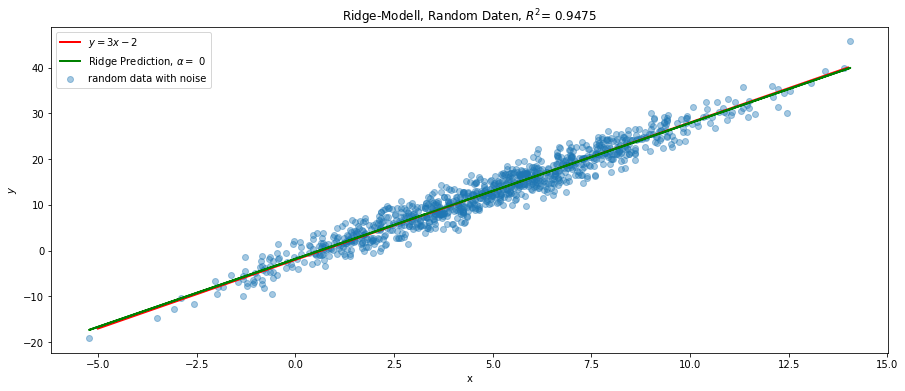

found minima [-1.79773375  2.96770563] after 918 steps


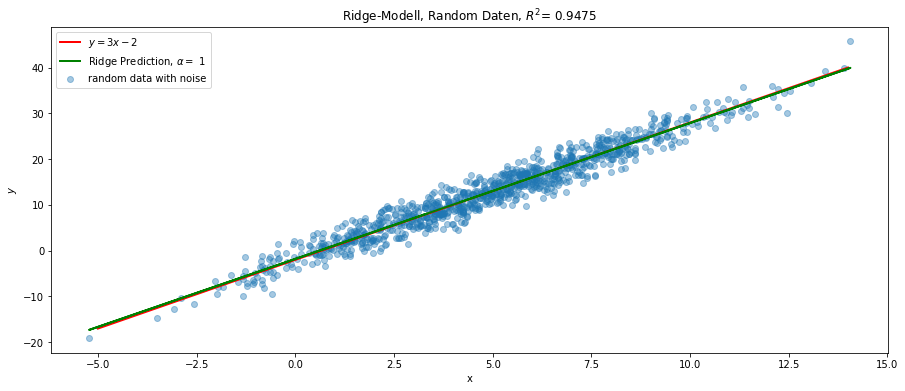

found minima [-1.71887223  2.95166284] after 914 steps


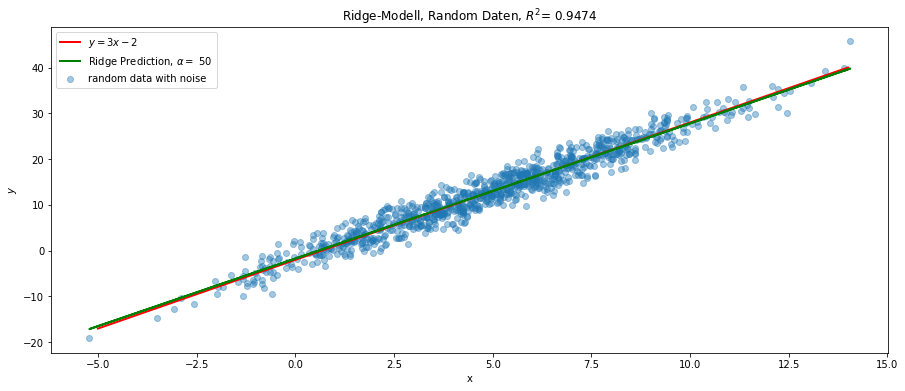

found minima [-1.56054704  2.91945476] after 906 steps


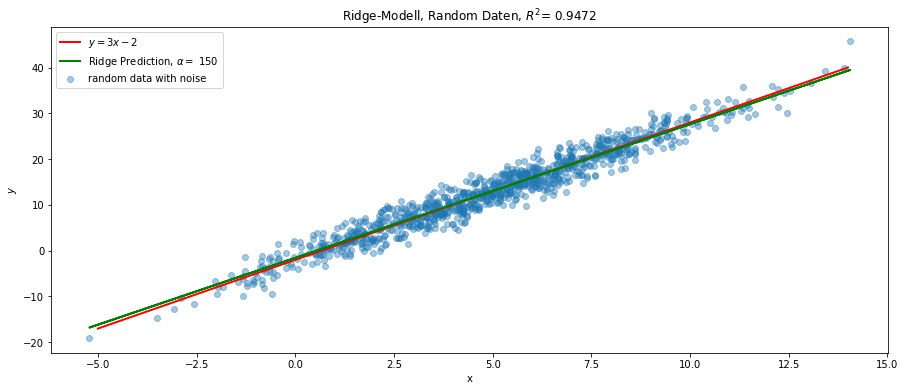

found minima [-1.48267313  2.90361287] after 902 steps


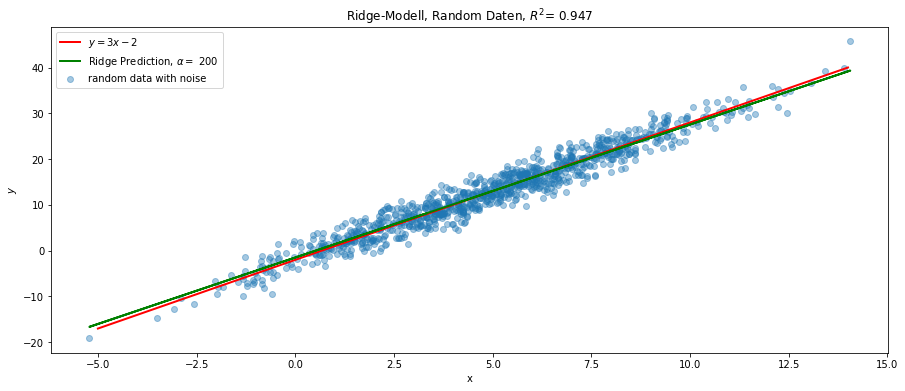

found minima [-1.03261786  2.81205817] after 877 steps


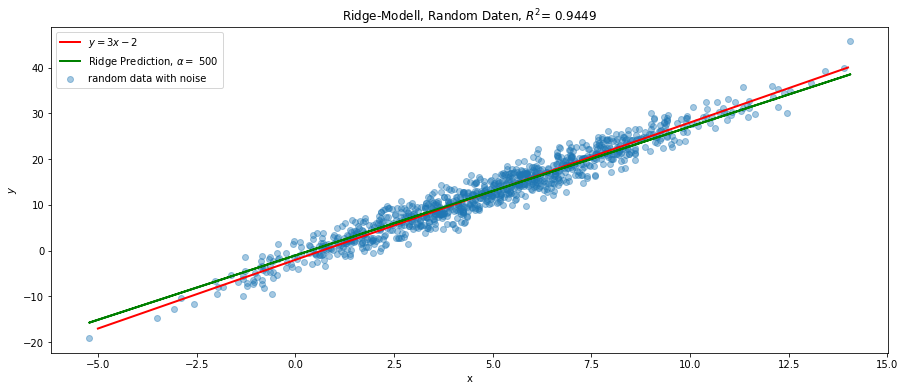

found minima [-0.61007849  2.72610093] after 3308 steps


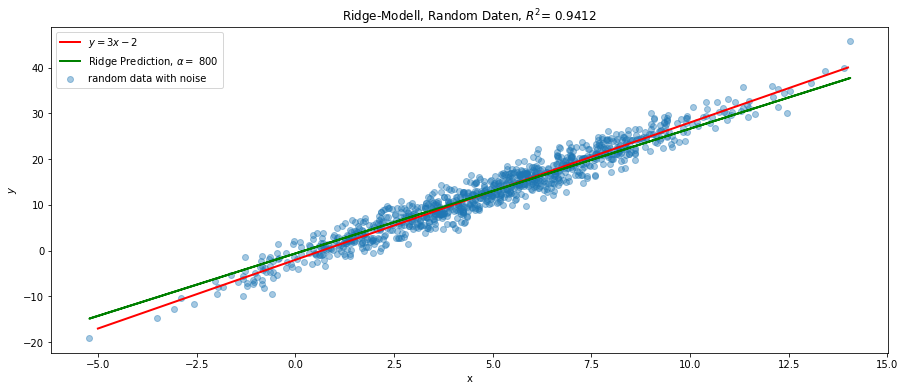

Max Anzahl steps reached: max=5000 


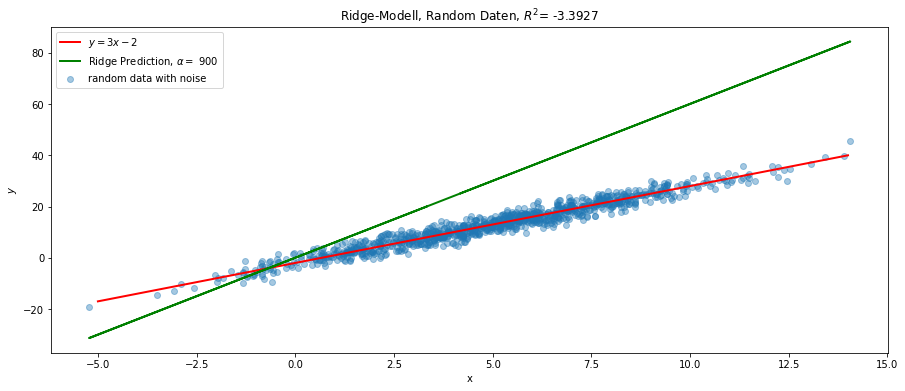

In [857]:
alpha_param = [0, 1, 50, 150, 200, 500, 800, 900]
for i, alpha in enumerate(alpha_param):
    # Erstelle Ridge Modell mit Inputdaten
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_gd = ridge_model_gd.predict(X_rand_data)
    # R2 score
    r2_ridge_gd = ridge_model_gd.score(X_rand_data, y_rand_data)

    plot_modell(x_rand_data, y_rand_data, y_ridge_pred_gd, ridge_model_gd.alpha, r2_ridge_gd)

In den oben erstellten Grafiken werden RidgeRegregressions Modelle mit verschiedenen alpha Parameter gezeigt. Der Alpha Wert beieinflusst wie stark die Regularisierung stattfindet, grössere Werte regulieren stärker. 
- bei $\alpha = 0$ wird keine Regularisierung verwendet. (Strafterm wird 0)
- mit zunehmendem $\alpha$ wird durch den Strafterm der RidgeRegression einen Bias hinzugefügt. Damit kann ein Overfitten des Modells auf den Testdaten kontrolliert werden. Der $R^2$ wird zwar schlechter aber das Modell performt besser auf Testdaten oder wenn neue Werte zum Datensatz hinzukommen.
- Welche Werte für $\alpha$ sinnvoll sind, muss ausprobiert werden. Einen zu hohen $\alpha$ Wert, zum Beispiel in der Grafik mit $\alpha = 900$ wird die Regularisierung zu stark angewendet. Bei noch höheren Werten wird nur noch den Intercept ($\beta_0$) verwendet, die restlichen Variablen ausgeschlossen. 

Testen der **RidgRegression - Gradient Funktion** mit festen $\alpha$ , $\beta$ Werten und Random Datensatz.

In [858]:
beta_test = [-2, 3]
alpha = 0.5
gradient_test = RidgeRegression.gradient(beta_test, X_rand_data, y_rand_data, alpha)
print(f'Gradient für beta:{beta_test} ist {gradient_test}')

Gradient für beta:[-2, 3] ist [-87.03279371 151.45890586]


Testen der **Ridge Regression - Normalengleichung** für verschiedene $\alpha$ Parameter:

found minima [-1.79935385  2.96803511]


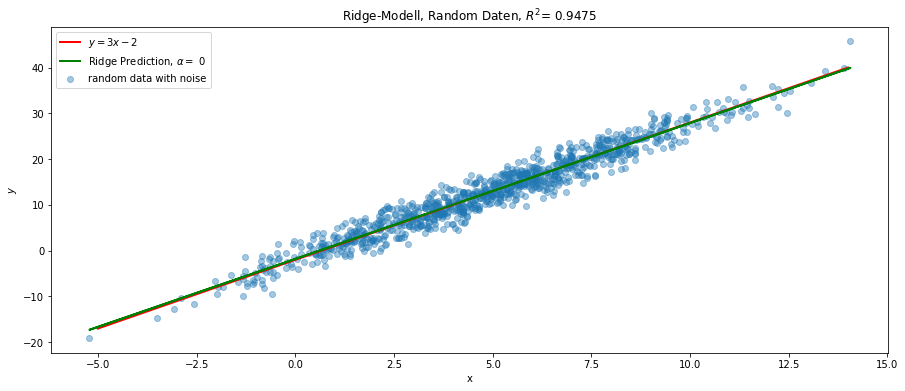

found minima [-1.80965105  2.96952578]


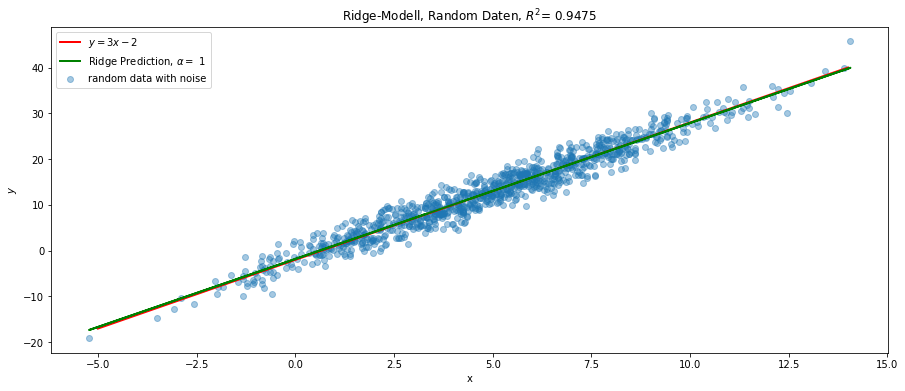

found minima [-2.34087524  3.04720215]


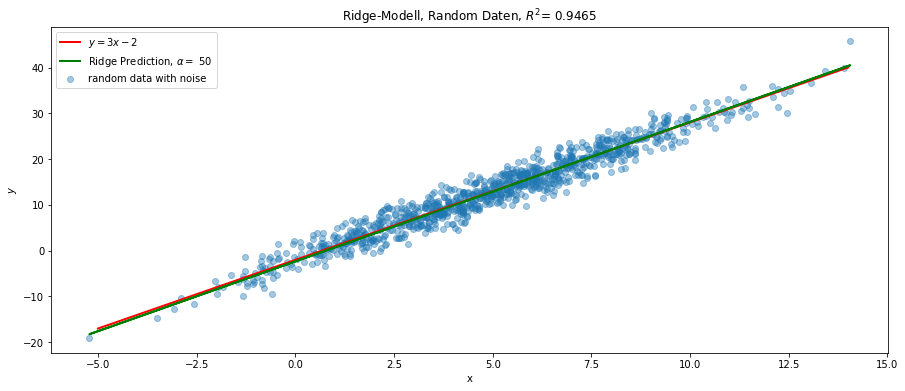

found minima [-3.61880128  3.23931899]


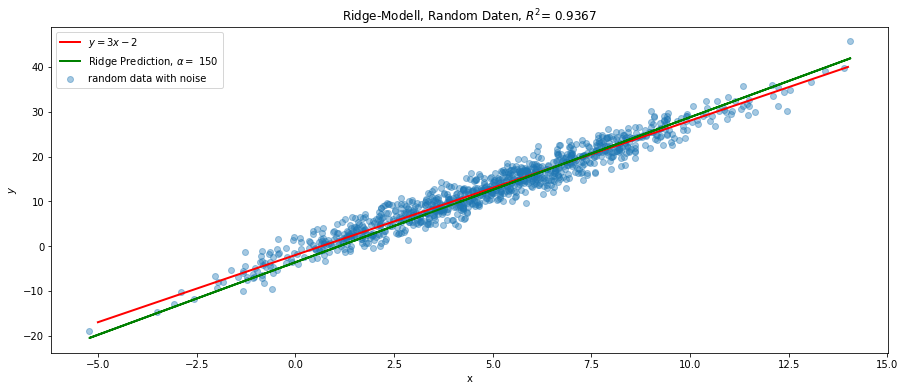

found minima [-4.3822833  3.3569014]


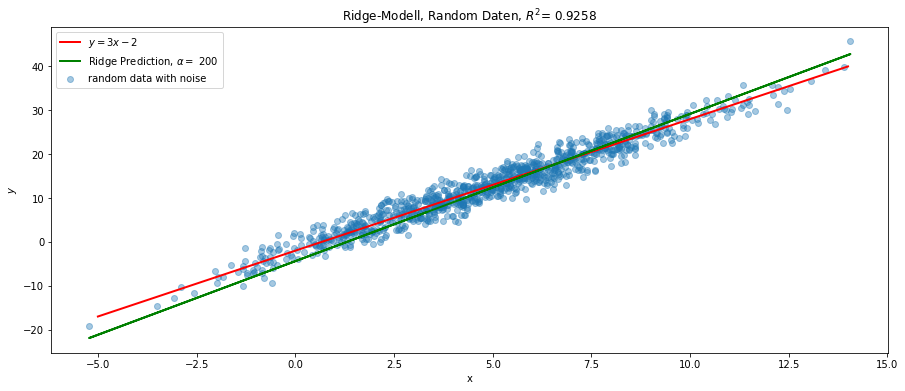

found minima [-12.56469546   4.68181686]


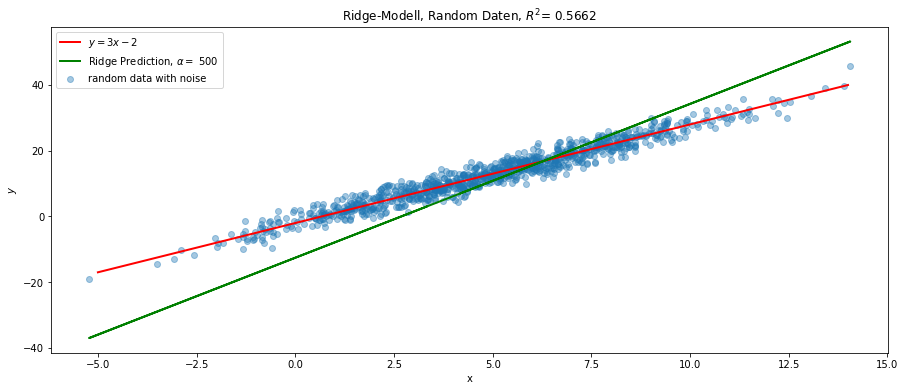

found minima [-59.34080096  12.61987833]


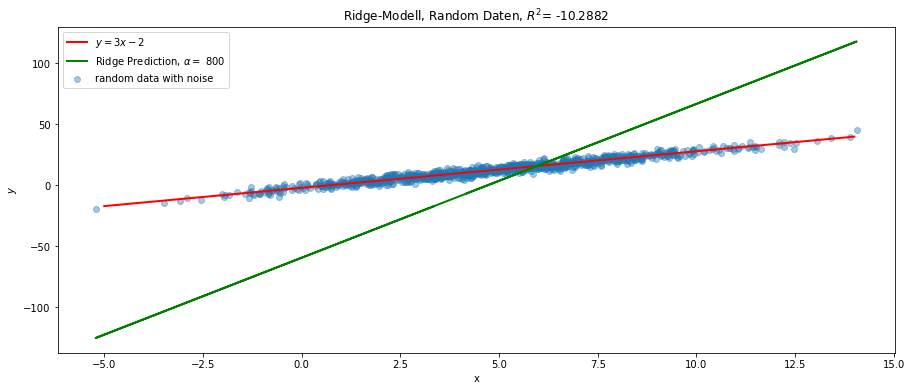

found minima [-333.36751327   59.52133954]


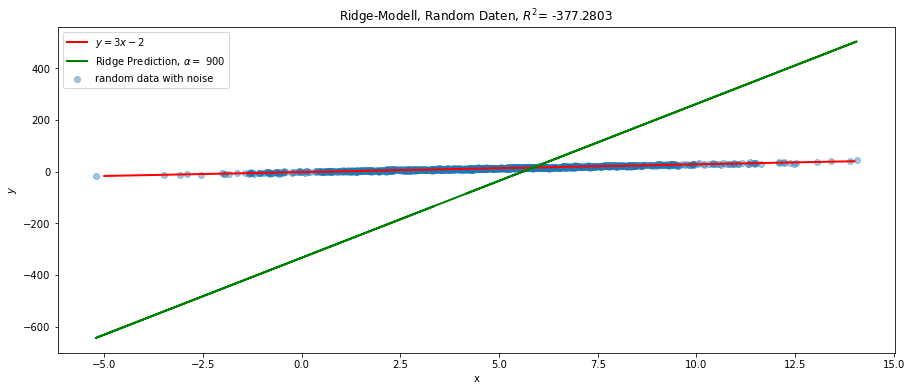

In [859]:
alpha_param = [0, 1, 50, 150, 200, 500, 800, 900]
for alpha in alpha_param:
    # Erstelle Ridge Modell mit Inputdaten
    ridge_model_neq = RidgeRegression(opt_method='neq', alpha= alpha).fit(X_rand_data, y_rand_data)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_neq = ridge_model_neq.predict(X_rand_data)
    # R2 score
    r2_ridge_neq = ridge_model_neq.score(X_rand_data, y_rand_data)

    plot_modell(x_rand_data, y_rand_data, y_ridge_pred_neq, ridge_model_neq.alpha, r2_ridge_neq)

Die oben erstellten Grafiken verwenden für die Modelle die Normalengleichung. Dieselben $\alpha$-Parameter wie bei Gradient Descent sollen die stattfindende Regularisierung zeigen. Im Gegensatz zu Gradient Descent verwendet die Normalengleichung keine Suche sondern findet mit Linearer Algebra direkt die $\beta$-Parameter.  

Testen der **KostenFunktion**, RidgeRegression.costfunction():

found minima [-1.80449987  2.96877999]


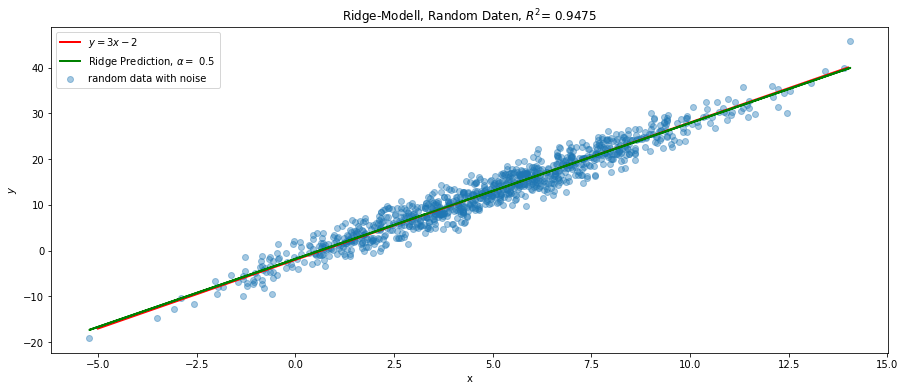

In [860]:
# Erstelle Ridge Modell mit Inputdaten
ridge_model_neq = RidgeRegression(opt_method='neq', alpha= 0.5).fit(X_rand_data, y_rand_data)
# Erstelle Ridge Modell Prediciton
y_ridge_pred_neq = ridge_model_neq.predict(X_rand_data)
# R2 score
r2_ridge_neq = ridge_model_neq.score(X_rand_data, y_rand_data)

plot_modell(x_rand_data, y_rand_data, y_ridge_pred_neq, ridge_model_neq.alpha, r2_ridge_neq)

best beta Modell parameter gefunden: [-1.79854288  2.96787023]
Wert Kostenfunktion Modell:       4408.55


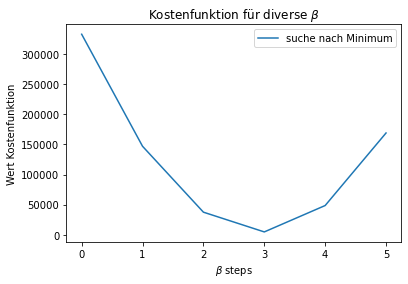

In [861]:
# get optimal betas
print(f'best beta Modell parameter gefunden: {ridge_model.beta_}')
print(f'Wert Kostenfunktion Modell: \
      {RidgeRegression.costfunction(ridge_model.beta_, X_rand_data, y_rand_data, ridge_model.alpha)}')

# create range around optimal beta parameter
beta_0_range = np.arange(-3, 0, 0.5) 
beta_1_range = np.arange(0, 6, 1) 

assert(len(beta_0_range) == len(beta_1_range))

# calc each beta paramter
cost_func = []
for b0, b1 in zip(beta_0_range, beta_1_range):
    #print(b0, b1)
    cost = RidgeRegression.costfunction([b0, b1], X_rand_data, y_rand_data, ridge_model.alpha)
    cost_func.append(cost)
cost_func

# plot costfunction with different beta values
plt.plot(np.arange(0,6,1), cost_func, label=f'suche nach Minimum')
plt.title('Kostenfunktion für diverse $\\beta$')
plt.xlabel('$\\beta$ steps')
plt.ylabel('Wert Kostenfunktion')
plt.legend()
plt.show()

Eine 3D Grafik würde das Suchen des globalen Minimums besser aufzeigen, die 2D Grafik soll die Idee hinter der argmin(costfunction) zeigen, nämlich den kleinsten Wert der Kostenfunktion zu finden und die besten $\beta$ Modellkoeffizienten ausgeben. Was die Grafik deutlich zeigt.

In [862]:
# Modell mit Gradient Descent und Normalengleichung
alpha = 1
ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)
ridge_model_neq = RidgeRegression(opt_method='neq', alpha= 0.5).fit(X_rand_data, y_rand_data)

found minima [-1.79773375  2.96770563] after 918 steps
found minima [-1.80449987  2.96877999]


In [863]:
# zeigen das die beta-parameter die selben sind
np.testing.assert_array_almost_equal(ridge_model_gd.beta_, ridge_model_neq.beta_, decimal=2, verbose=False)

Die gefundenen Parameter $\beta_0$ und $\beta_1$ sind gleich. Die Abweichungen könnte optimiert werden:
- indem bei Gradient Descent die Lernrate verbessert wird (exakteres Minimum suchen) 
- das Runden auf mehr Dezimalstellen erlaubt wird

### Aufgabe 4 (7 Punkte)

Schreibe nun eine Funktion, die einen Contour Plot der Kostenfunktion erstellt (siehe dazu gml Aufgabenblatt 1 im Trainingcenter). Zeichne den Pfad von Gradient Descent durch die Koeffizientenebene ein (dazu musst du die obige Klasse modifizieren) und untersuche und vergleiche den Plot für

- unterschiedliche Regularisierungsstärken, inkl. ohne Regularisierung.
- mit und ohne Standardisierung der Input-Daten.

Diskutiere deine Einsichten.

In [864]:
import pandas as pd

In [865]:
# Contour Plot der Kostenfunktion aus Aufgabenblatt 1
def create_contour_plot(X, y, alpha, steps_beta, betalims=(-10., 10.), resolution=.2, ax=None):

    # Schritte für beta als panda Dataframe um Betas zu verwenden
    steps_beta_taken = pd.DataFrame(steps_beta)
    
    # create meshgrid
    xx1, xx2 = np.meshgrid(np.arange(betalims[0], betalims[1], resolution),
                         np.arange(betalims[0], betalims[1], resolution))

    Z = []
    for b0, b1 in zip(xx1.ravel(), xx2.ravel()):
        Z.append(RidgeRegression.costfunction(np.array([b0, b1]), X, y, alpha))

    Z = np.array(Z).reshape(xx1.shape)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    else:
        fig = None

    ax.contour(xx1, xx2, Z, levels=np.linspace(Z.min(), Z.max(), 20))
    ax.plot(steps_beta_taken[0], steps_beta_taken[1])
    ax.set_title(f'Weg Gradient Descent mit alpha={alpha}')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_xlabel(r'$\beta_0$')
    
    if fig is not None:
        return fig, ax

**Zeichne den Pfad von Gradient Descent** mit unterschiedlichen Regularisierungen (ohne Standardisierung).

alpha = 0
found minima [-1.79935209  2.96803485] after 918 steps
alpha = 1
found minima [-1.79773375  2.96770563] after 918 steps
alpha = 400
found minima [-1.17944932  2.84192808] after 887 steps
alpha = 800
found minima [-0.61007849  2.72610093] after 3308 steps
alpha = 1000
Max Anzahl steps reached: max=5000 


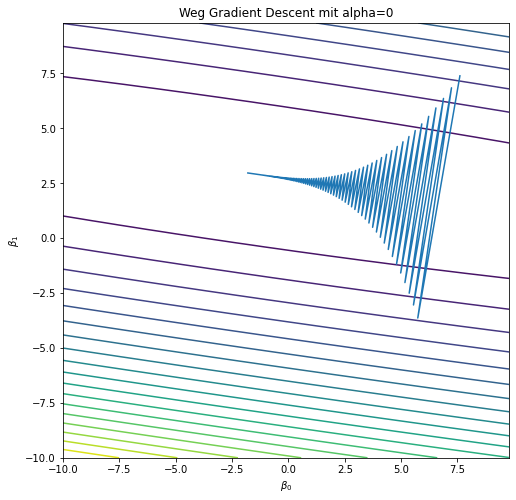

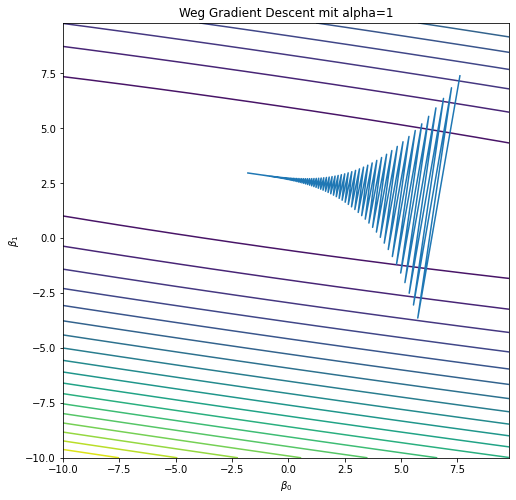

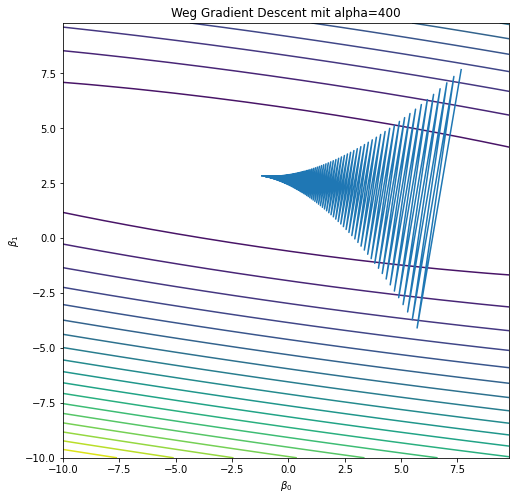

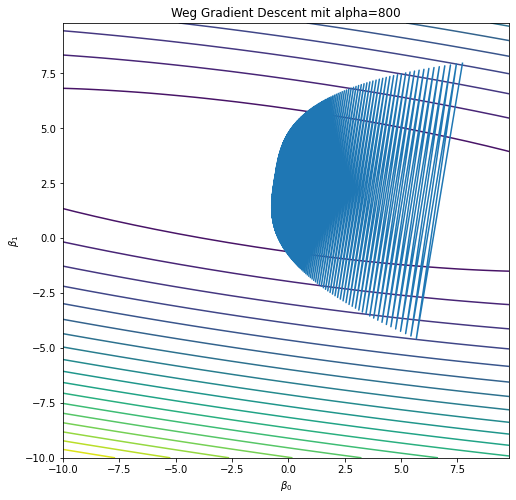

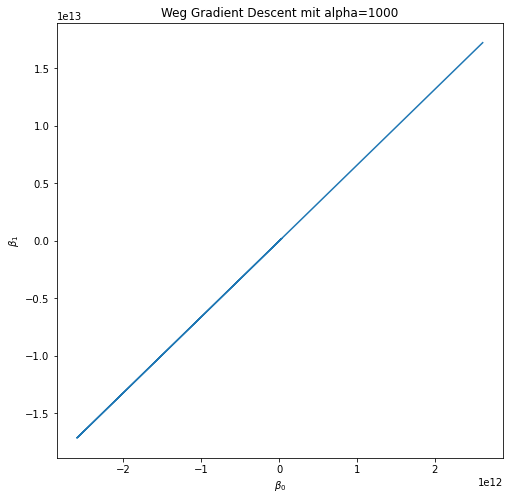

In [866]:
alpha_param = [0, 1, 400, 800, 1000]
for alpha in alpha_param:
    #create Modell
    print(f'alpha = {alpha}')
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)    
    
    # Zeichne Gradient Descent Weg
    fig_a0, ax_a0 = create_contour_plot(X_rand_data, y_rand_data, alpha, 
                                        ridge_model_gd.steps_beta_, betalims=(-10., 10.), resolution=.2)
    

Die oben erstellten Contour Plots zeigen den Pfad den Gradient Descent nimmt für verschieden Regularisierungen ($\alpha$). Gradient Descent wird so lange ausgeführt bis der Gradienten Vektor fast verschwindet. Hier wenn die Euklidischen Norm des Gradienten < eps ist.  
Aus den Grafiken wird ersichtlich dass mit erhöhen der Regularisierung nicht mehr dass exakte Minimum erreicht wird, also den Strafterm zu den Betas hinzugefügt wird. Auch interessant ist, das die Suche zum Minimum mit $\alpha = 800$ bereits vier mal länger dauert (3158 steps statt 835). Somit erhöht sich auch der Rechenaufwand. Bei  $\alpha=1000$ divergiert die Suche, dies war auch in den früheren Regressionsplot ersichtlich.

**Zeichne den Pfad von Gradient Descent** mit unterschiedlichen Regularisierungen (mit Standardisierung).

In [867]:
# Original daten (nicht Standardisiert)
X_rand_data

array([[1.        , 4.18786303],
       [1.        , 5.31454416],
       [1.        , 5.75158345],
       ...,
       [1.        , 6.50295811],
       [1.        , 3.33720616],
       [1.        , 3.32255787]])

In [868]:
# Standardisierung der Input Daten (als Matrix)
X_rand_data_norm = RidgeRegression.normalize_matrix(X_rand_data)
X_rand_data_norm

array([[ 1.        , -0.24241833],
       [ 1.        ,  0.13284289],
       [ 1.        ,  0.27840661],
       ...,
       [ 1.        ,  0.52866532],
       [ 1.        , -0.52574475],
       [ 1.        , -0.53062363]])

In [869]:
# Standardisierung der Input Daten (als Vektor)
x_rand_data_norm = RidgeRegression.normalize_vector(x_rand_data)
#y_rand_data_norm2 = RidgeRegression.normalize_vector(y_rand_data)
# Zusätzliches Rauschen beigefügt
y_rand_data_norm = 3*x_rand_data_norm -2 + np.random.normal(0, 0.5, n)

alpha = 0
found minima [-1.99560812  3.01668678] after 274 steps
alpha = 1
found minima [-1.99560812  3.01367311] after 274 steps
alpha = 400
found minima [-1.99560806  2.15477612] after 272 steps
alpha = 800
found minima [-1.99560806  1.67593698] after 272 steps
alpha = 1000
found minima [-1.99560806  1.50834328] after 272 steps
alpha = 10000
found minima [-1.99560806  0.27424423] after 272 steps


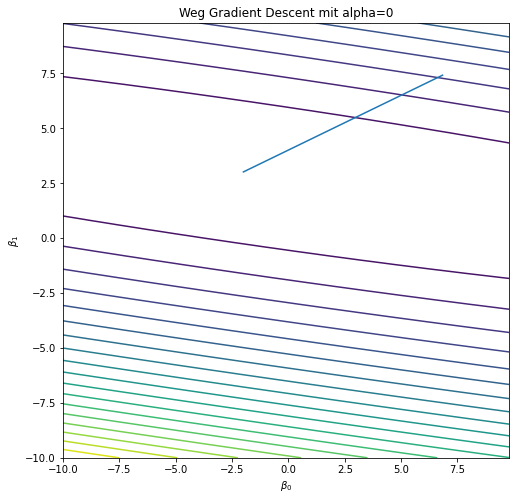

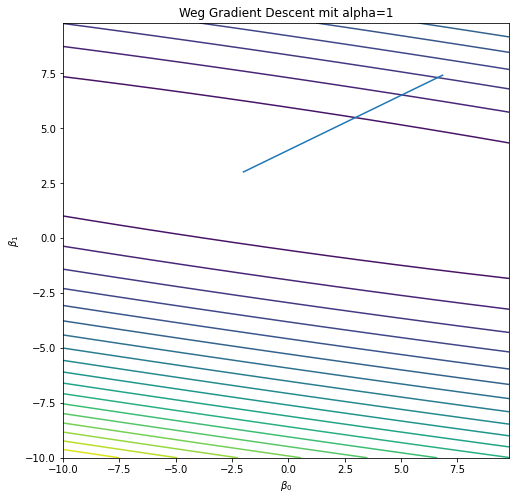

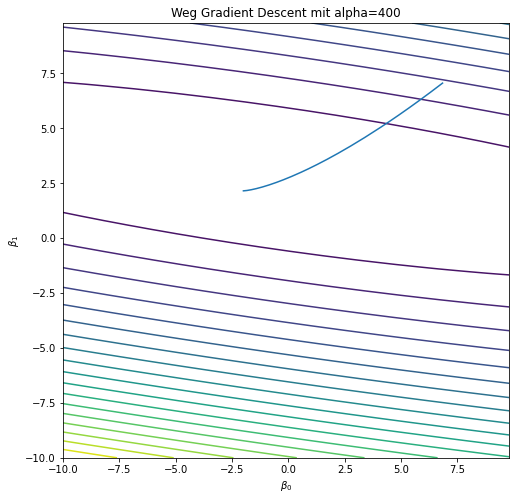

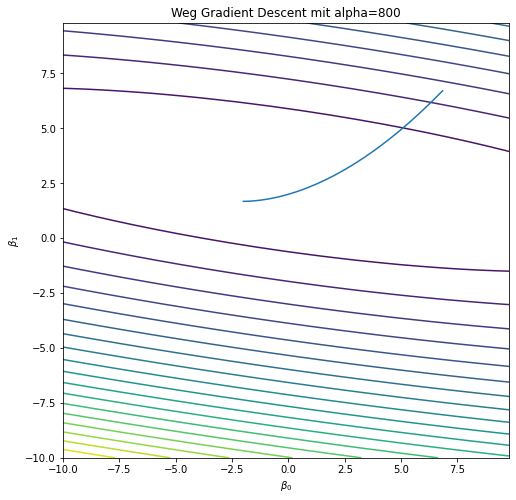

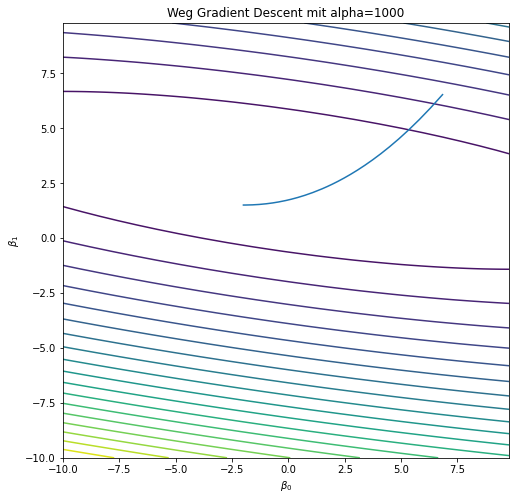

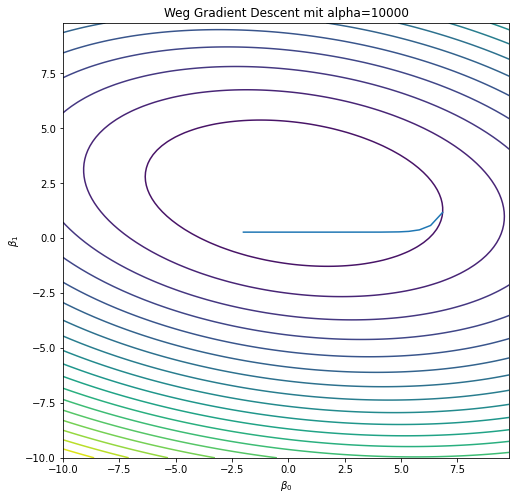

In [870]:
# Pfad Gradient Descent mit Contourplot zu verschiedenen alpha parameter
alpha_param = [0, 1, 400, 800, 1000, 10000]
for alpha in alpha_param:
    #create Modell
    print(f'alpha = {alpha}')
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data_norm, y_rand_data_norm)
    
    # Zeichne Gradient Descent Weg
    fig_a0, ax_a0 = create_contour_plot(X_rand_data, y_rand_data, alpha, 
                                        ridge_model_gd.steps_beta_, betalims=(-10., 10.), resolution=.2)

Erklärung plot ->

found minima [-1.99560812  3.01668678] after 274 steps


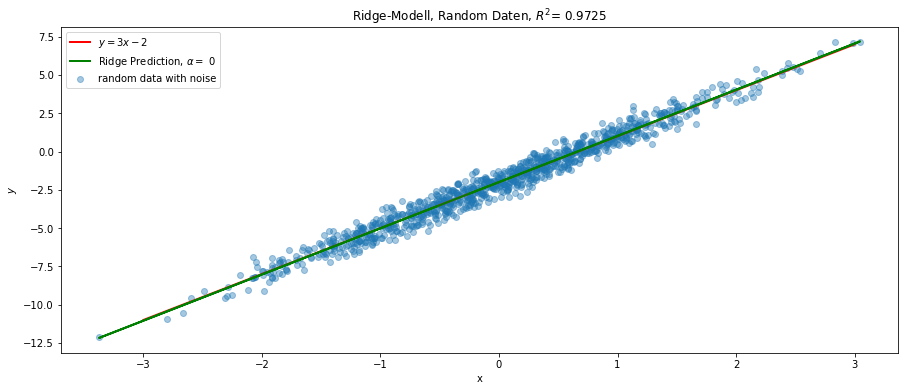

found minima [-1.99560812  3.01367311] after 274 steps


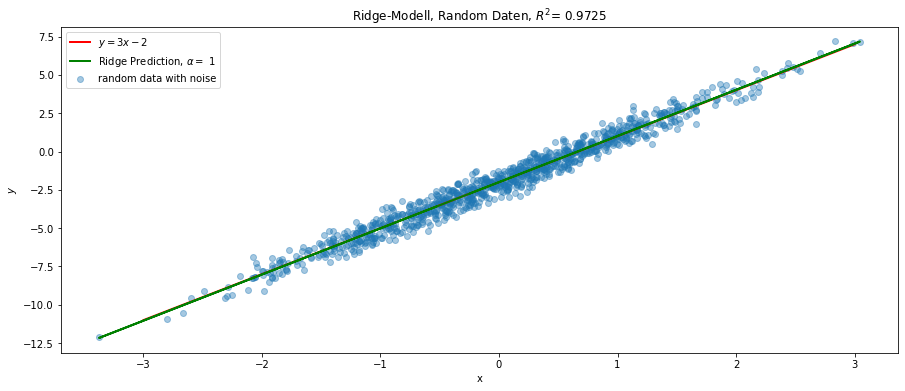

found minima [-1.99560806  2.15477612] after 272 steps


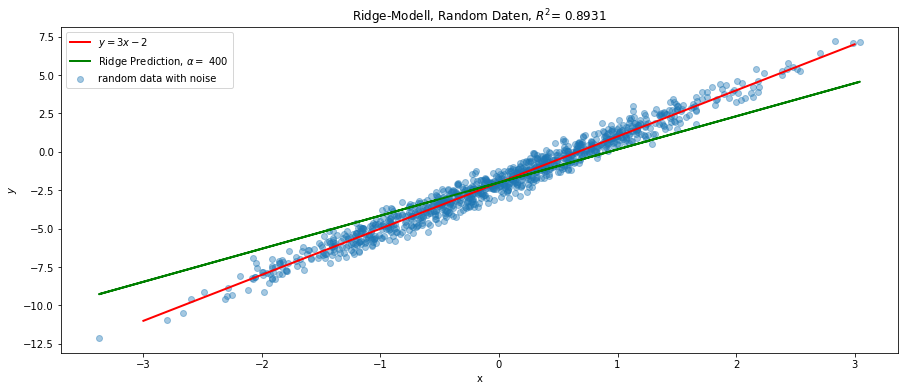

found minima [-1.99560806  1.67593698] after 272 steps


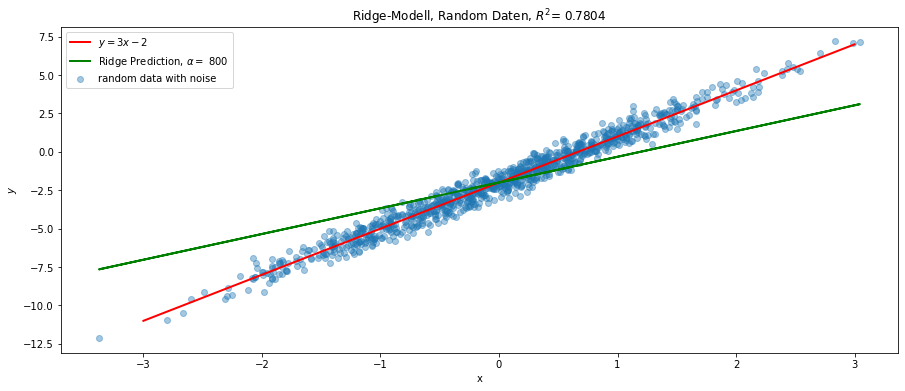

found minima [-1.99560806  1.50834328] after 272 steps


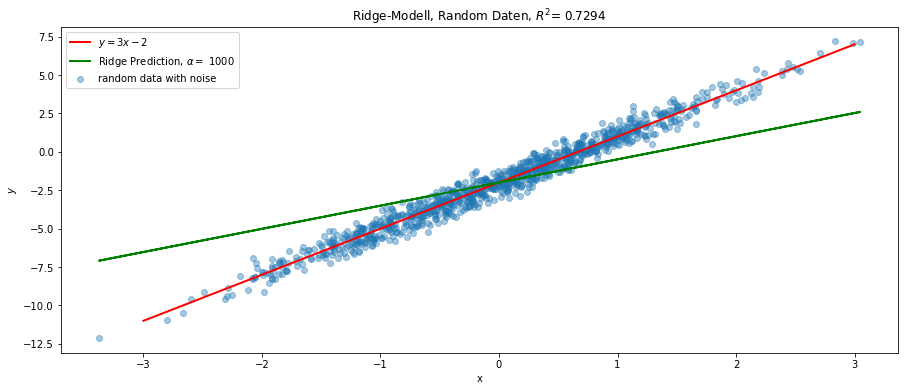

found minima [-1.99560806  0.27424423] after 272 steps


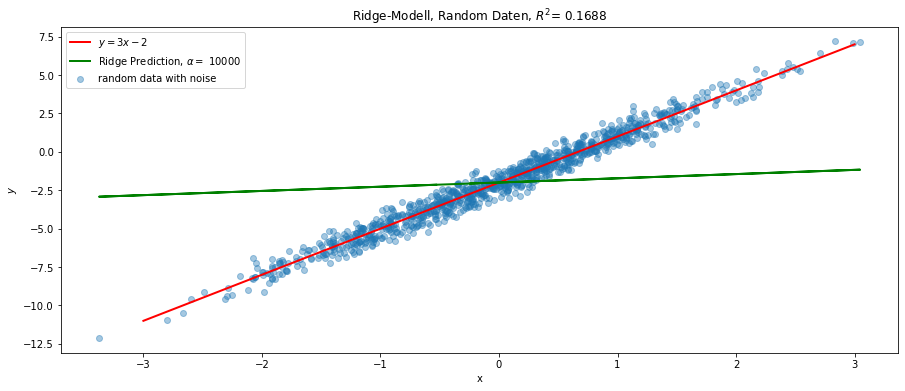

In [871]:
for i, alpha in enumerate(alpha_param):
    # Erstelle Ridge Modell mit Inputdaten
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data_norm, y_rand_data_norm)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_gd = ridge_model_gd.predict(X_rand_data_norm)
    # R2 score
    r2_ridge_gd = ridge_model_gd.score(X_rand_data_norm, y_rand_data_norm)

    plot_modell(x_rand_data_norm, y_rand_data_norm, y_ridge_pred_gd, ridge_model_gd.alpha, r2_ridge_gd, x_range=[-3, 4])

Durch die Normierung der Inputdaten werden alle Variablen auf den selben Nenner gebracht, sind also um Null verteilt und 99.9% der Daten befinden sich im $3\sigma$ Bereich. Bei normierten Inputdaten $x$ verläuft der Pfad des Gradient Descent direkt zum Minimum (kein hin und herspringende Suche). Das wird wohl noch eindeutiger wenn mehrere, nicht normiert, Inputdaten  verwendet werden. Das Minimum mit der selben Suche ($eps=0.00003$) wird mit ~270 steps gefunden. Interessant ist das beim verkleinern von $eps=0.000003$ die gleichen $\beta$-parameter gefunden werden aber nun ~3000 Schritte notwendig werden. Um Rechenleistung zu sparen kann auch $eps$ optimiert werden (dies könnte aber evtl durch das runden der Gradienten passieren).

Somit zeigt sich das normieren für die Inputvariabeln für Regression Modelle, zu besseren und schnelleren Resultaten führen. Auch zeige sich höhere $\alpha$-Werte als stabiler, ohne normierung divergierte die Suche bei $\alpha=1000$. Mit den normierten Inputdaten, sieht man dass bei $\alpha=10000$ das Modell einer horizontale Geraden annährt. Der Ridge Strafterm lässt nur noch $\beta_0$ zu. Die übrigen $\beta$ werden praktisch 0 (Aber nie gleich 0, dafür gibt es Lasso Regression)  

Etwas speziell ist das die optimalen Parameter $\alpha, eta, eps$ gefunden werden müssen und wohl bei jedem Modell (mit anderen Daten) wieder anders aussehen. Auf jedenfall lohnt es sich diese Parameter genauer anzuschauen und verschiedene Möglichkeiten auszuprobieren (Genauigkeit des Modells und Rechenaufwand). Schwierig wird es wohl im Mehrdimensionalen Bereich (d>3), da dort keine Grafischen Hilsfmittel zur Verfügung stehen.

*Bemerkung: Das Rauschen in der Funktion $y=3x - 2$ wurde für normierte Inputwerte angepasst. Das Rauschen wurde in beiden Fällen hinzugefügt um nicht bereits bei den Daten (plot(x,y)) eine Gerade zu erhalten. Deshalb lassen sich die beiden $R^2$ Scores nicht direkt vergleichen*

### Aufgabe 5 (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, den Preis (`price`) der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.  

Unterteile den Datensatz nun noch in Trainings- und Testdaten (80:20) für die weiteren Aufgaben.

YOUR ANSWER HERE

In [872]:
import pandas as pd

In [873]:
# YOUR CODE HERE
df_moto = pd.read_csv('../data/moto.csv')
df_moto

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki


In [874]:
df_moto.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_shape        5619 non-null   object 
 1   colour            5605 non-null   object 
 2   condition         5619 non-null   object 
 3   displacement      5619 non-null   float64
 4   fuel              5612 non-null   object 
 5   has_mfk           5619 non-null   bool   
 6   performance       5619 non-null   float64
 7   price             5619 non-null   int64  
 8   curb_weight       5619 non-null   float64
 9   registration_age  5619 non-null   int64  
 10  mileage           5619 non-null   float64
 11  brand             5619 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 488.5+ KB


**Ueberblick verschaffen:**
1. Datentypen untersuchen
1. fehlende Werte und Outliers suchen
1. Fehler in den Daten Suchen und ggf. korrigieren
1. Kolinearität zwischen Attributen suchen
1. Variablen Transformationen untersuchen

**1.** Datentypen untersuchen
- Attr:body_shape hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:colour hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:condition hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:fuel hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:brand hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung

In [875]:
df_moto_clean = df_moto.copy()

attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']
for attr in attributs_cat:
    df_moto_clean[attr] = df_moto_clean[attr].astype("category")
df_moto_clean.dtypes

body_shape          category
colour              category
condition           category
displacement         float64
fuel                category
has_mfk                 bool
performance          float64
price                  int64
curb_weight          float64
registration_age       int64
mileage              float64
brand               category
dtype: object

**2.** fehlende Werte und Outliers suchen

In [876]:
# suche fehlende Werte
df_moto_clean.isna().sum()

body_shape           0
colour              14
condition            0
displacement         0
fuel                 7
has_mfk              0
performance          0
price                0
curb_weight          0
registration_age     0
mileage              0
brand                0
dtype: int64

Insgesamt gibt es 14 missings in colour und 7 in fuel. Es könnte untersucht werden wiso es zu fehlenden Werten kommt. Da es jedoch sehr wenige Werte sind werden diese entfernt.

In [877]:
df_moto_clean = df_moto_clean.dropna()

Untersuchen von Verteilungen und Outliers

<ipython-input-878-d2af4b039a6a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


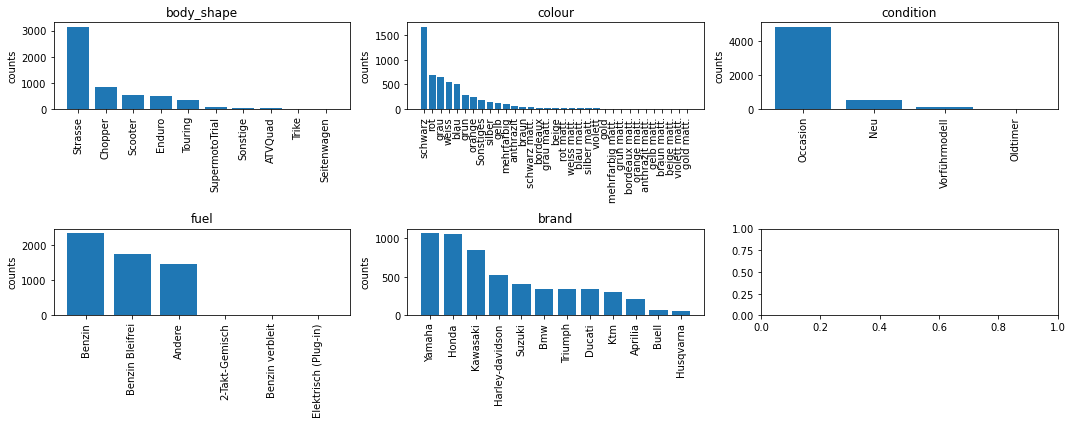

In [878]:
# Verteilung Kategorische Attribute absolute
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts()
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

<ipython-input-879-b8509ae1f365>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


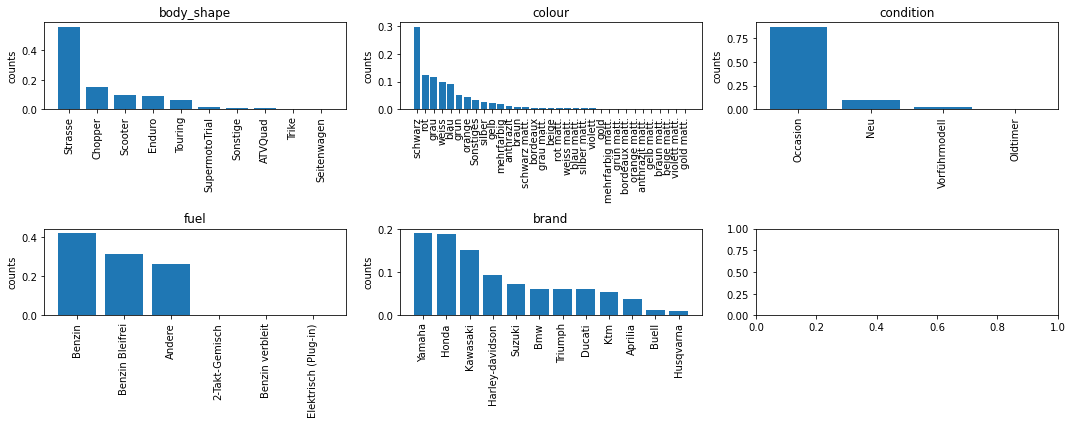

In [879]:
# Verteilung Kategorische Attribute percent
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts() / len(df_moto_clean[attr])
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

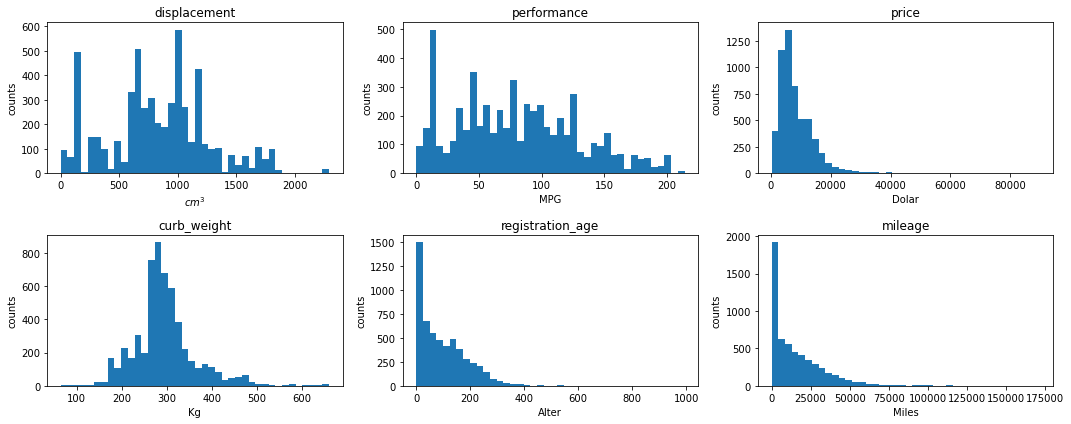

In [880]:
# Verteilung Numerischen Attributen
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
x_units = [r'$cm^3$', 'MPG', 'Dolar', 'Kg', 'Alter', 'Miles']

for i, attr in enumerate(attribut_num):
    ax[i].hist(df_moto_clean[[attr]], bins=40)
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

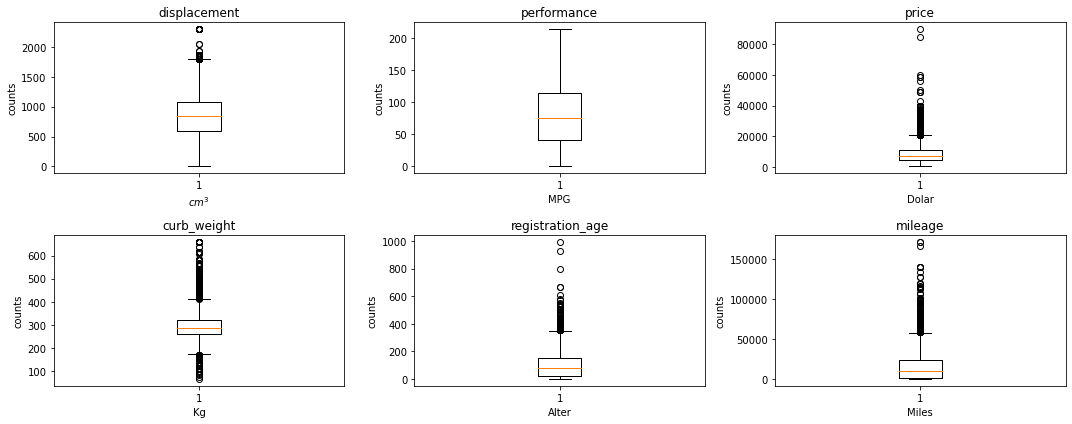

In [881]:
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()

for i, attr in enumerate(attr_plot):
    ax[i].boxplot(df_moto_clean[[attr]])
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

Fazit aus den oben erstellten Grafiken:
- In den Kategorische Attributen kommen einige Werte sehr oft vor und andere sehr selten. Zum Beispiel ist Condition zu +75% Occasionen, Farbe schwarz ist sehr dominierend mit 30%, die Fareb gold matt praktisch +0%, Oldtimer auch sehr tief).
- Achutng bei der Modellentwicklung mit sehr wenigen Daten in den Kategorischen Daten.
- In den Numerischen Werten sieht man ein logarithmisches Verhalten in Preis, Alter und Miles.
- In den Boxplots zeigt sich das Log-Verhalten erneut. 

**3.** Fehler in den Daten suchen
- Aus den Verteilungen der numerischen Daten sollten die 0-Werte oder nahe 0 Werte genauer untersucht werden. Zum Beispiel price, performance, displacement gleich oder nahe an 0.
- Bis auf das Attribut:Age sind die maximalen ranges der numersichen Variablen vernümpftige Werte, sollten aber bei der Modellentwicklung evtl erneut untersucht werden 

In [882]:
df_moto_clean[(df_moto_clean['displacement'] < 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1022,Scooter,orange,Occasion,1.0,Benzin verbleit,True,14.96,2800,179.0,46,29200.0,Ktm
3484,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,7800,179.0,35,1700.0,Ktm
3560,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),False,15.00,6900,179.0,58,887.0,Ktm
3561,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),False,15.00,12290,179.0,0,1.0,Ktm
3562,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,8500,179.0,22,300.0,Ktm
3563,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),True,15.00,12990,179.0,0,1.0,Ktm
4096,Enduro,blau,Vorführmodell,0.0,Benzin,True,0.00,14490,340.0,34,100.0,Yamaha
4581,Strasse,schwarz,Neu,15.0,Benzin,False,0.00,4480,182.0,0,1.0,Honda


In [883]:
df_moto_clean[(df_moto_clean['displacement'] > 1800)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
340,Chopper,Sonstiges,Occasion,2053.0,Andere,False,93.0,6000,565.0,141,29000.0,Kawasaki
366,Chopper,Sonstiges,Occasion,2053.0,Andere,False,103.0,7200,556.0,187,60000.0,Kawasaki
769,Chopper,Sonstiges,Occasion,2293.0,Andere,False,141.0,7700,585.0,177,13300.0,Triumph
772,Chopper,rot,Occasion,2294.0,Andere,False,140.0,9990,425.0,153,20236.0,Triumph
774,Chopper,rot,Occasion,2294.0,Andere,False,140.0,34900,425.0,128,38500.0,Triumph
...,...,...,...,...,...,...,...,...,...,...,...,...
5224,Touring,schwarz,Occasion,1867.0,Benzin,True,102.0,28500,488.0,29,19300.0,Harley-davidson
5285,Sonstige,schwarz,Occasion,1867.0,Benzin,True,94.0,35500,392.0,12,10.0,Harley-davidson
5286,Chopper,schwarz,Neu,1867.0,Benzin,True,94.0,42980,392.0,0,10.0,Harley-davidson
5300,Chopper,schwarz,Neu,1867.0,Benzin,True,91.0,28400,378.0,0,1.0,Harley-davidson


Werte unterhalb 40ccm sind eindeutig Datenfehler und werden entfernt, Hubraum grösser 1800 ccm werden als Outlier gesehen und entfernt

In [884]:
# Werte unterhalb 40ccm sind eindeutig Datenfehler und werden entfernt
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['displacement'] < 40) | (df_moto_clean['displacement'] > 1800))]
df_moto_clean.shape

(5598, 12)


(5474, 12)

In [885]:
# Umrechung MPG zu l/100 damit verhältniss besser geschätzt werden kann
df_moto_clean = df_moto_clean.rename(columns={'performance':'MPG'})
df_moto_clean['l_100km'] = np.round(235.214 / df_moto_clean['MPG'],0)
df_moto_clean[(df_moto_clean['l_100km'] > 30) & (df_moto_clean['displacement'] < 1000)]

,body_shape,colour,condition,displacement,fuel,has_mfk,MPG,price,curb_weight,registration_age,mileage,brand,l_100km
763,Enduro,weiss,Occasion,249.0,2-Takt-Gemisch,False,7.00,7400,182.0,66,4000.0,Husqvarna,34.0
937,Enduro,Sonstiges,Occasion,293.0,Andere,True,7.00,5990,335.0,41,12000.0,Ktm,34.0
1004,Enduro,orange,Occasion,249.0,Benzin verbleit,True,7.07,5200,175.0,34,8200.0,Ktm,33.0
1005,Enduro,schwarz,Occasion,249.0,Benzin verbleit,True,7.07,4700,175.0,34,10200.0,Ktm,33.0
1019,Enduro,orange,Occasion,249.0,Andere,True,7.00,6400,175.0,48,2190.0,Ktm,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Scooter,blau,Occasion,49.0,Benzin,False,3.00,990,181.0,148,8944.0,Aprilia,78.0
5382,Chopper,schwarz,Occasion,805.0,Benzin,False,0.00,17950,244.0,295,16800.0,Kawasaki,inf
5393,Chopper,schwarz,Occasion,903.0,Benzin,False,0.00,15950,357.0,12,1.0,Kawasaki,inf
5394,Chopper,grau,Occasion,903.0,Benzin,False,0.00,39500,357.0,130,1500.0,Kawasaki,inf


Das Attribute performance (neu MPG / l_100km) scheint einge falsche Weete zu haben. 333 Messpunkte weisen über 20 Liter pro 100km auf. Was in Anbetracht des tiefen Hubraum, sehr unwahrscheinlich ist.  

Als Motorradfahrer vermute ich, dass der Verbrauch auf den Kaufpreis eher weniger Einfluss hat. Daher werden die offensichtlich falschen Werte vorerst behalten. evtl nutzen die restliche Attribute der Observationen.

In [886]:
df_moto_clean[df_moto_clean['price'] < 500]

,body_shape,colour,condition,displacement,fuel,has_mfk,MPG,price,curb_weight,registration_age,mileage,brand,l_100km
1913,Scooter,blau,Occasion,125.0,Andere,False,11.0,420,215.0,237,21440.0,Yamaha,21.0
2494,Scooter,grau,Occasion,125.0,Benzin Bleifrei,False,14.0,495,224.0,246,20554.0,Honda,17.0
2510,Scooter,schwarz,Occasion,49.0,Benzin Bleifrei,False,3.0,279,152.0,274,22200.0,Honda,78.0


In [887]:
df_moto_clean[df_moto_clean['price'] > 30_000]

,body_shape,colour,condition,displacement,fuel,has_mfk,MPG,price,curb_weight,registration_age,mileage,brand,l_100km
323,Chopper,grau,Occasion,903.0,Benzin Bleifrei,False,50.00,39500,353.0,130,1500.0,Kawasaki,5.0
414,Strasse,schwarz,Occasion,998.0,Benzin Bleifrei,True,200.00,31500,313.0,12,10.0,Kawasaki,1.0
2469,Touring,Sonstiges,Occasion,1500.0,Andere,False,82.96,30700,475.0,222,80000.0,Honda,3.0
2642,Strasse,schwarz,Oldtimer,1340.0,Benzin Bleifrei,False,40.00,56000,260.0,994,100.0,Harley-davidson,6.0
2669,Chopper,Sonstiges,Occasion,1449.0,Andere,False,70.00,32000,526.0,177,15000.0,Harley-davidson,3.0
2735,Chopper,anthrazit,Occasion,1689.0,Andere,True,74.00,33900,399.0,48,8042.0,Harley-davidson,3.0
2778,Touring,weiss,Occasion,1745.0,Andere,True,89.00,48900,463.0,21,30.0,Harley-davidson,3.0
2780,Touring,schwarz,Occasion,1745.0,Andere,True,90.00,33000,463.0,22,5283.0,Harley-davidson,3.0
2793,Touring,weiss,Occasion,1745.0,Andere,True,90.00,32900,451.0,26,14000.0,Harley-davidson,3.0
2808,Touring,Sonstiges,Occasion,1745.0,Andere,True,91.00,33000,487.0,43,4000.0,Harley-davidson,3.0


keine Preise mit 0 festgestellt. tiefste Preise scheinen erklärbar in Anbetracht der mileage. Preise über 30'000 scheinen z.B für Harley-davidson erklärbar. Werden dennoch als Outlier gesehen und entfernt.

In [888]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~(df_moto_clean['price'] > 30_000)]
df_moto_clean.shape

(5474, 13)


(5440, 13)

In [889]:
print(f'max registartion_age = {df_moto_clean["registration_age"].max()}')
df_moto_clean[df_moto_clean['registration_age'] > 100]

max registartion_age = 930


,body_shape,colour,condition,displacement,fuel,has_mfk,MPG,price,curb_weight,registration_age,mileage,brand,l_100km
6,Strasse,rot,Occasion,750.0,Benzin Bleifrei,False,76.0,3900,220.0,340,48000.0,Kawasaki,3.0
7,Strasse,grau,Occasion,498.0,Benzin Bleifrei,False,27.0,3600,274.0,257,3500.0,Kawasaki,9.0
8,Strasse,Sonstiges,Occasion,499.0,Andere,False,34.0,2750,380.0,245,19390.0,Kawasaki,7.0
9,Chopper,grau,Occasion,124.0,Benzin Bleifrei,False,11.0,1900,223.0,245,11597.0,Kawasaki,21.0
10,Chopper,rot,Occasion,124.0,Benzin Bleifrei,False,12.0,2800,223.0,245,31200.0,Kawasaki,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,6500,271.0,163,24000.0,Kawasaki,1.0
5613,Strasse,grün,Occasion,997.0,Benzin,False,175.0,4600,271.0,165,20730.0,Kawasaki,1.0
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki,1.0
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki,1.0


Das Alter des Motorrads wäre ein gutes Attribut für das Modell. Da rund die hälfte älter > 100 ist, liegt die vermutung nahe das es sich hier Monate seit der Registrierung handel. Für eine bessere Übersicht wird das Alter zusätzlich in Jahren berechnet.

In [890]:
# Untersuche 0 Wert
df_moto_clean[(df_moto_clean['registration_age'] == 0) & (df_moto_clean['mileage'] > 100)]

,body_shape,colour,condition,displacement,fuel,has_mfk,MPG,price,curb_weight,registration_age,mileage,brand,l_100km
3303,Strasse,orange,Neu,955.0,Benzin,False,98.0,7000,305.0,0,200.0,Triumph,2.0
3427,Strasse,schwarz,Neu,899.0,Benzin,False,55.0,9900,292.0,0,800.0,Triumph,4.0
3747,Strasse,weiss matt.,Neu,1037.0,Benzin,True,101.0,13700,303.0,0,150.0,Suzuki,2.0
3919,Strasse,blau,Neu,689.0,Benzin,False,75.0,8790,270.0,0,450.0,Yamaha,3.0
3946,Strasse,schwarz,Neu,847.0,Benzin,False,115.0,11390,285.0,0,250.0,Yamaha,2.0
3989,Trike,blau,Neu,847.0,Benzin,True,11.0,17790,338.0,0,300.0,Yamaha,21.0
4359,Strasse,schwarz,Neu,847.0,Benzin,True,115.0,11990,266.0,0,900.0,Yamaha,2.0
4368,Strasse,schwarz,Neu,997.0,Benzin,True,160.0,13690,285.0,0,250.0,Yamaha,1.0
5153,Strasse,rot,Neu,1198.0,Benzin,True,137.0,16890,286.0,0,120.0,Ducati,2.0
5397,Strasse,grau,Neu,649.0,Benzin,True,61.0,8700,300.0,0,900.0,Kawasaki,4.0


0 Werte scheinen ok zu sein, da Motorrad als neu verkauft wird.

In [891]:
df_moto_clean['age_year'] = np.round(df_moto_clean['registration_age'] / 12, 0)
df_moto_clean[(df_moto_clean['age_year'] > 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,MPG,price,curb_weight,registration_age,mileage,brand,l_100km,age_year
395,Strasse,braun,Oldtimer,498.0,Benzin Bleifrei,False,60.00,12000,185.0,528,20000.0,Kawasaki,4.0,44.0
743,Strasse,Sonstiges,Occasion,125.0,Andere,False,12.00,2760,203.0,535,34800.0,Suzuki,20.0,45.0
903,Strasse,rot,Occasion,750.0,Benzin verbleit,False,53.00,9800,200.0,518,17500.0,Triumph,4.0,43.0
904,Strasse,blau,Oldtimer,744.0,Benzin Bleifrei,False,42.00,11000,205.0,488,35244.0,Triumph,6.0,41.0
1138,Touring,schwarz,Oldtimer,250.0,Benzin verbleit,False,12.00,6900,145.0,798,40100.0,Bmw,20.0,66.0
1447,Strasse,schwarz,Oldtimer,250.0,Benzin Bleifrei,False,18.00,7800,160.0,666,2550.0,Bmw,13.0,56.0
1448,Strasse,schwarz,Oldtimer,248.0,Benzin verbleit,False,18.00,7800,166.0,666,2500.0,Bmw,13.0,56.0
1449,Touring,schwarz,Oldtimer,600.0,Benzin Bleifrei,True,40.00,8900,210.0,547,80100.0,Bmw,6.0,46.0
2566,Strasse,mehrfarbig,Occasion,249.0,Benzin Bleifrei,True,26.00,2200,160.0,572,51734.0,Honda,9.0,48.0
2567,Strasse,rot,Oldtimer,750.0,Benzin verbleit,True,67.00,12000,240.0,523,46000.0,Honda,4.0,44.0


Sechs Motorräder sind älter als 50 Jahre mit max = 83. Für oldtimer scheint das wohl möglich. Zusätzlich soll noch nach mileage gefiltert werden. Alte Motorräder mit wenig Fahrkilometer können vorkommen aber können als Outlier entfernt werden.
Bei der Modellentwicklung schauen obe es sinnvoller ist nach quantilen zu entfernen.

In [892]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['age_year'] > 30) & (df_moto_clean['mileage'] < 5000))]
df_moto_clean = df_moto_clean[~(df_moto_clean['age_year'] > 50)]
df_moto_clean.shape

(5440, 14)


(5431, 14)

**4.** Koolinearitäten prüfen  
Bei Modellen sollte auf Attribute geachtet werden die nicht unabhängig von einander sind. Hohe $R^2$ Werte weisen auf Kolinearität hin (>0.8).   
*Bemerkung: Die folgende Tabelle mit Pearson Korrelation kann nur Koolinearität finden aber nicht feststellen ob keine vorhanden ist. Um Kolinearität auszuschliessen könnten Modelle mit einzelnen Attributen als Zielvariable benutzt werden.*

In [893]:
attribut_num = ['displacement', 'MPG', 'price', 'curb_weight', 'registration_age', 'mileage']
attribut_corr = df_moto_clean[attribut_num].corr()
attribut_corr.style.background_gradient(cmap='coolwarm')

,displacement,MPG,price,curb_weight,registration_age,mileage
displacement,1.000000,0.651845,0.611060,0.763405,0.091160,0.225287
MPG,0.651845,1.000000,0.459673,0.353235,-0.064143,0.104218
price,0.611060,0.459673,1.000000,0.460519,-0.363545,-0.312476
curb_weight,0.763405,0.353235,0.460519,1.000000,0.072552,0.201968
registration_age,0.091160,-0.064143,-0.363545,0.072552,1.000000,0.683607
mileage,0.225287,0.104218,-0.312476,0.201968,0.683607,1.000000


Attribute wie MPG-Displacment und curb_weigt-displacment zeigen eine hohe Korrelation. $R^2 < 0.8$ aber in der Modellentwicklung testen was passiert, wenn eine der Variablen weggelassen wird.

**5.** Variablen transformationen 
Preis, Alter und Miles zeigen ein logarithmisches Verhalten. Dise könnten Transformiert werden um eine Normal Verteilung zu erhalten. Da Gewicht, Alter, Preis unterschiedlich Gross sind macht ein Standardisierung auch Sinn.

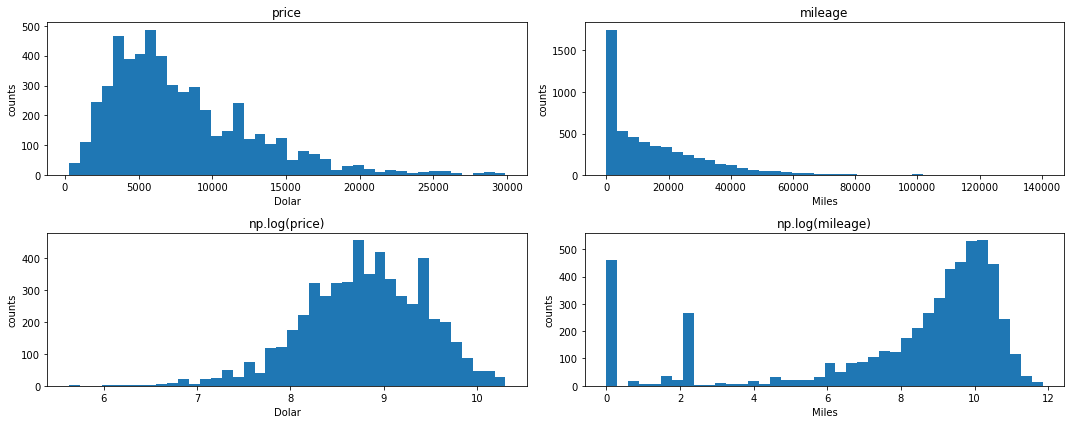

In [894]:
# Zeigen das mit log Transformation Daten normal Verteilt sind (registration_age enthält 0 Werte)
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()
attribut_log = ['price', 'mileage'] * 2
x_units_log = ['Dolar', 'Miles'] * 2

for i, attr in enumerate(attribut_log):
    if i <=1:
        ax[i].hist(df_moto_clean[[attr]], bins=40)
        ax[i].set_title(attr)
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')
    else:
        ax[i].hist(np.log(df_moto_clean[[attr]]), bins=40)
        ax[i].set_title(f'np.log({attr})')
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')    
    
fig.tight_layout()
plt.show()

### Aufgabe 6 (3 Punkte)

Erstelle ein erstes einfaches lineares Modell für `price`, bloss mit der einen Input-Variablen `displacement`.  

Untersuche für die unregularisierte OLS-Lösung die Modell-Annahmen eines linearen Modells. Schau dir dazu *Kapitel 4 - Residuenanalyse* im Skript von Werner Stahel an, wenn du Anleitung möchtest.    

Nimm, falls sinnvoll, Variablen-Transformationen vor, um dein Modell zu verbessern und untersuche den Effekt. Erkläre dein Vorgehen.

In [895]:
# YOUR CODE HERE

In [896]:
# Funktion Plot 2 zum plotten von Modellen
def plot2_modell(x, y, y_predict, beta, alpha, r2, title='Ridge Regression', xlabel='x', ylabel='y'):
    ''' Modell plots
    '''
    # Modell Regressionslinie
    x_line = np.arange(x.min(), x.max(), 1)
    y_line = beta[0] + (beta[1] *x_line )
    
    # Plot data
    plt.figure(figsize=(15,6))
    plt.scatter(x, y, alpha=0.4, label='data')
    # Modell fit
    plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
    #plt.plot(X, y_predict, color='green', linewidth=2, label=f'Ridge Prediction, $\\alpha=$ {alpha}')
    plt.title(f'{title}, $R^2$= {r2}, $alpha$={alpha}')
    plt.xlabel(xlabel), plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    #return p

In [897]:
# Funktion Plot 2 zum plotten von Modellen
def plot3_modell(x, y, y_predict, beta, alpha, r2, ax=None, title='Ridge Regression', xlabel='x', ylabel='y'):
    ''' Modell plots
    '''
    # Modell Regressionslinie
    x_line = np.arange(x.min(), x.max(), 1)
    y_line = beta[0] + (beta[1] *x_line )
    
    # Plot data
    ax.scatter(x, y, alpha=0.4, label='data')
    # Modell fit
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
    #plt.plot(X, y_predict, color='green', linewidth=2, label=f'Ridge Prediction, $\\alpha=$ {alpha}')
    ax.set_title(f'{title}, $R^2$= {r2}, $alpha$={alpha}')
    ax.set_xlabel(xlabel), ax.set_ylabel(ylabel)
    return ax

In [898]:
def plot_residuen(y, y_predict, bins=20):
    fig, ax = plt.subplots(1,2, figsize=(15,6))    
    resid = y_price - y_pred_disp
    
    # Residiuen Plot
    ax[0].scatter(x_disp, resid, alpha=0.3, label='Residuen')
    ax[0].axhline(0, color='red', label=r'$E(x)=0$', linestyle='-.')
    ax[0].set_xlabel('displacment')
    ax[0].set_ylabel('Residuen')
    ax[0].set_title('Tukey-Anscombe Plot')
    ax[0].legend()    
    # Histogram Plot
    resid_mean = np.round(resid.mean(),10)
    ax[1].hist(resid, bins=bins, label=f'E(x)={resid_mean}')
    ax[1].axvline(resid_mean, color='red', linestyle='-.')
    ax[1].set_xlabel('Residuen')
    ax[1].set_ylabel('count')
    ax[1].set_title('Histogram Residuen')
    ax[1].legend() 
    
    plt.show()

**Modell ohne Variablen-Transformation** ohne Regularisierung

found minima [1980.91376902    7.45828204]
found minima [-2486.05012733    36.01621742]
found minima [10003.69985523   -20.29893661]
found minima [ 9.36932617e+03 -8.76163268e-02]


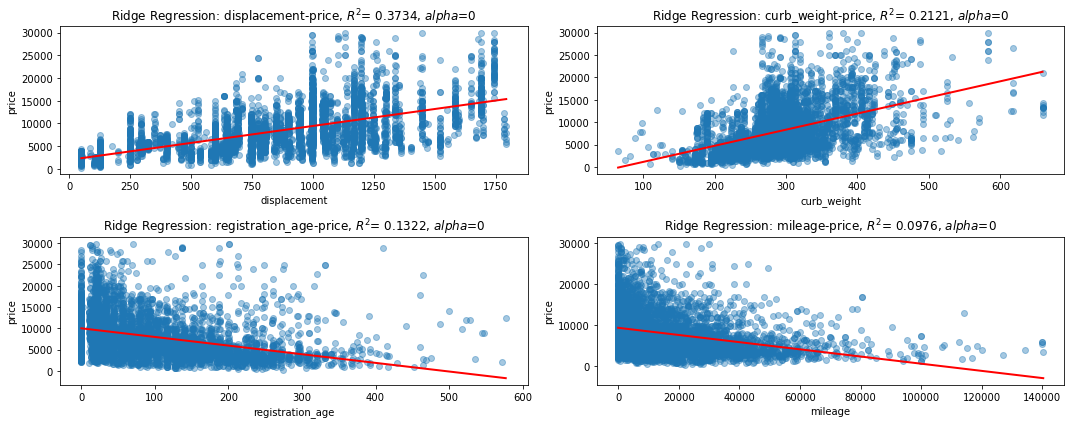

In [899]:
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()

simple_modell_attr = ['displacement', 'curb_weight', 'registration_age', 'mileage']
# save for loop models
simp_modells = []
X_data_all = []

for i, attr in enumerate(simple_modell_attr):
    # Parameter erstellen
    x1 = np.array(df_moto_clean[attr])
    y1 = np.array(df_moto_clean['price'])
    X_data_1 = np.vstack([np.ones(df_moto_clean.shape[0]), x1]).T
    
    # Modell erstellen
    simp_modell = RidgeRegression(opt_method='neq', alpha= 0, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_data_1, y1)
    simp_modells.append(simp_modell)
    r2_simp_modell = simp_modell.score(X_data_1, y1)
    y1_pred = simp_modell.predict(X_data_1)
 
    # plot modell subplots
    plot3_modell(x1, y1, y1_pred, simp_modell.beta_, simp_modell.alpha, r2_simp_modell, 
             ax[i], title=f'Ridge Regression: {attr}-price', xlabel=attr, ylabel='price')
    
fig.tight_layout()
plt.show()

Keines der Modelle erhält einen guten $R^2$ hin. Beim besten Modell Displacement kann eine positive Korrelanz gesehen werden, aber zum Beispiel bei 1000ccm ist die Preisspanne sehr gross.   
Mit der Residuen analyse können weitere Schritte festgelegt werden (Variable Transformation)   
Diese drei Merkmale müssen für ein gutes Modell erfüllt sein:
1. Der Erwartungswert $E(x)$ ist 0,
1. Die Fehler sind normalverteilt,
1. Die Fehler sind unabhängig, also zeigen kein Muster

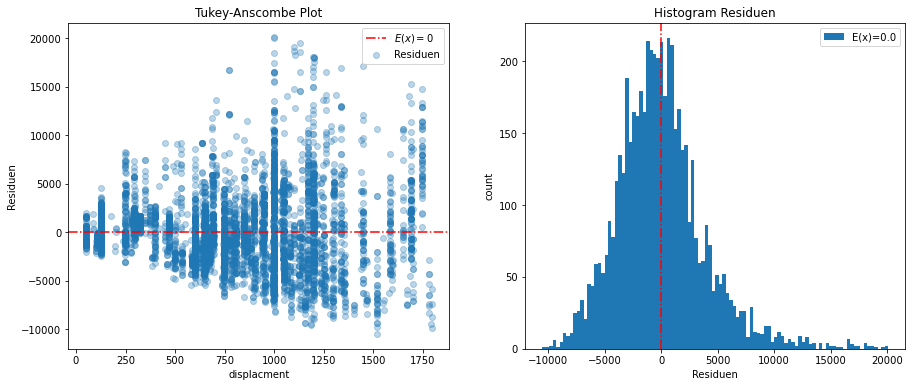

In [900]:
# für die Analyse das Displacement Modell verwendet
y_price = np.array(df_moto_clean['price'])
x_disp = np.array(df_moto_clean['displacement'])
X_data_disp = np.vstack([np.ones(df_moto_clean.shape[0]), x_disp]).T
y_pred_disp = simp_modells[0].predict(X_data_disp)

# Residiuen Plot
plot_residuen(y_price, y_pred_disp, bins=100)

Aus der Residuen Analyse sieht man dass (1.) $E(x) = 0$ erfüllt ist, auch scheint (2.) im Histogram die Verteilung normal zu sein. (3) Der Tukey-Anscombe Plot zeigt aber ein Muster der Residuen, das Muster scheint Trichterförmig grösser zu werden. Dazu kann eine log-Transformation helfen.

**Modell mit Variablen-Transformation** ohne Regularisierung  
Die Log-Transformation wird angewendet um exponentiell Funktionen (wie zum Beispiel Preis) auf eine Normalverteilte Form zu bringen.

found minima [7.97329284e+00 1.01844566e-03]
found minima [7.37131472e+00 4.89061418e-03]
found minima [ 9.10344671e+00 -3.12133768e-03]
found minima [ 8.98656561e+00 -1.22421902e-05]


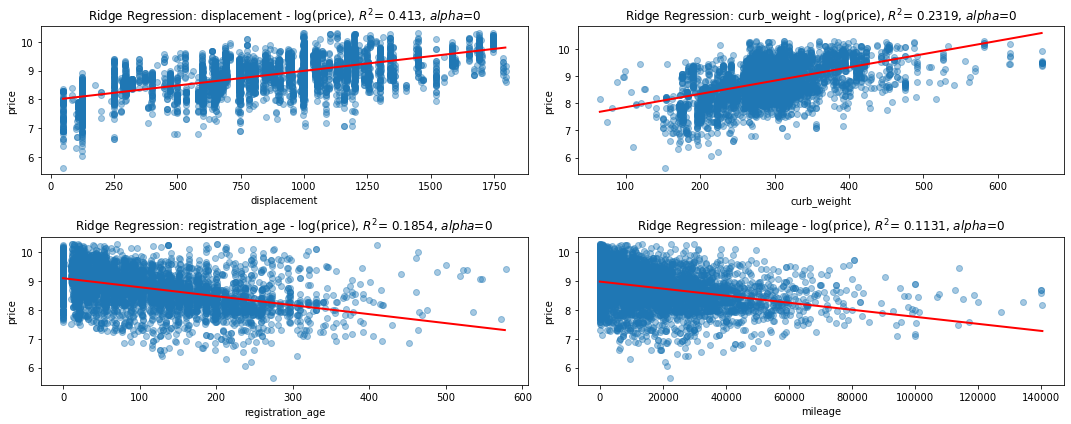

In [901]:
# mit Log-Transformation auf price
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()

simple_modell_attr = ['displacement', 'curb_weight', 'registration_age', 'mileage']
# save for loop models
simp_modells_log = []
X_data_all = []

for i, attr in enumerate(simple_modell_attr):
    # Parameter erstellen
    x1 = np.array(df_moto_clean[attr])
    y1 = np.array((np.log(df_moto_clean['price'])))
    X_data_1 = np.vstack([np.ones(df_moto_clean.shape[0]), x1]).T
    
    # Modell erstellen
    simp_modell = RidgeRegression(opt_method='neq', alpha= 0, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_data_1, y1)
    simp_modells_log.append(simp_modell)
    r2_simp_modell = simp_modell.score(X_data_1, y1)
    y1_pred = simp_modell.predict(X_data_1)
       
    # plot modell subplots
    plot3_modell(x1, y1, y1_pred, simp_modell.beta_, simp_modell.alpha, r2_simp_modell, 
             ax[i], title=f'Ridge Regression: {attr} - log(price)', xlabel=attr, ylabel='price')
    
fig.tight_layout()
plt.show()

Der $R^2$ Score ist noch nicht überzeugend, aber es werden durch die Transformation von price bereits in allen Modellen bessere $R^2$ Scores erziehlt. Die beiden oberen Grafiken zeigen ausserdem ein positivie Korrelation und die unteren eine negative Korrelation. 
Anhand der gegeben Attribute ist es wohl auch schwierig ein Modell mit nur einem Attribut zu erstellen das den Preis Vorhersagt.   
Die Residuen für displacment und log(price) sehen wie folgt aus:

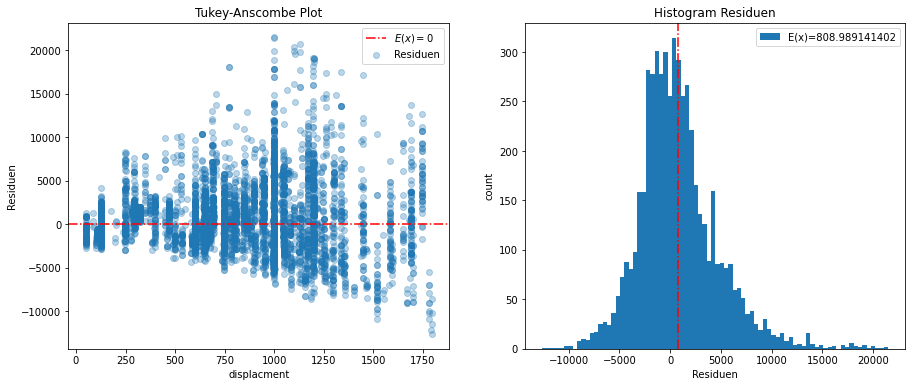

In [904]:
# für die Analyse des 'beste' Modell verwendet
y_price = np.array(df_moto_clean['price'])
x_disp = np.array(df_moto_clean['displacement'])
X_data_disp = np.vstack([np.ones(df_moto_clean.shape[0]), x_disp]).T
y_pred_disp_log = simp_modells_log[0].predict(X_data_disp)
# Predictions Rücktransformieren
y_pred_disp = np.exp(y_pred_disp_log)

# Residiuen Plot
plot_residuen(y_price, y_pred_disp, bins=80)

Die Log-Transformation hat die Trichterform der Residuen (rechts) ein wenig verbessert. Denoch werden die Residuen grösser mit zunahme von displacement (Hubraum). Auch den Bereich um 1000ccm zeigt weiterhin grössere Residuen. Auch ist nun $E(x) > 0$  

Eine einfach Lineare Regression scheint hier nicht ziehlführend für die Vorhersage des Preises 

YOUR ANSWER HERE

### Aufgabe 7 (4 Punkte)

Entwickle nun dein bestes Ridge-Regression-Modell im Sinne von $R^2$ auf dem Trainingsdatensatz. Du darfst durch Feature-Transformation beliebige weitere Attribute hinzufügen. Gebe $R^2$ und MAE auf dem Testdatensatz an.

Zur Optimierung der Hyperparameter kannst du scikit-learn-Funktionalität verwenden.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 8 (4 Punkte)

Erstelle einen Plot bei welchem du auf der x-Achse die Regularisierungsstärke $\alpha$ und auf der y-Achse $R^2$ für Trainings- und Testdaten (zwei Kurven) zeichnest. Diskutiere den Plot hinsichtlich Bias-Variance Trade-Off und der Verallgemeinerungsfähigkeit des Modells.  

Was ziehst du daraus für Schlüsse für weitere Modellierungsschritte?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 9 (10 Punkte)

Was ist das beste Modell für die Output-Variable `price` im Sinne von $R^2$, das du ohne Einschränkungen finden kannst?

Vergleiche dazu mindestens drei weitere Ansätze miteinander.

Wie verändert sich die Situation wenn du für den *Mean Absolute Error* (MAE) optimierst?

Hierzu kannst du scikit-learn Funktionalität verwenden.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 10 (4 Punkte)

Stelle nun die Resultate der bisherigen Aufgaben und Modelle tabellarisch und graphisch übersichtlich dar und diskutiere sie.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 11 (8 Punkte)

Nun betrachten wir noch dein bestes Modell etwas vertieft. Trainiere diesen Modell-Ansatz auf jeweils $[\frac{1}{10}, \frac{2}{10}, \frac{3}{10}, .., \frac{10}{10}]$ der Trainingsdaten. Erstelle nun einen Plot bei welchem der Wert der Kostenfunktion für die Trainings- und Testdaten auf der y-Achse und der Trainingsdatenanteil auf der x-Achse liegen möge. Zeichne also zwei Kurven in dieses Koordinatensystem.

Schau dir dazu das Video von [Kilian Weinberger zu Model Selection](https://www.youtube.com/watch?v=a7cofmFgwIk&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22) an.  

Interpretiere und diskutiere nun deine Einsichten zu Model Selection, Bias & Variance und Grösse des Datensatzes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE